# Musigma Hackathon Problem Statement

A personal loan is an unsecured credit provided by financial institutions based on criteria like employment history, repayment capacity, income level, profession, and credit history. This is also known as a consumer loan or a multi-purpose loan, and it helps the borrower meet any of their immediate needs.
One of the leading bankers in US has approached you to predict on the defaulters with the help of the recent data on the personal loans availed by various customers.
You are now asked to build a robust machine learning model that would distinguish the future applicants who might default and help the bank to take proactive measures.

In [1]:
# Importing all the required libraries

In [2]:
# importing Numpy for Advance Mathematical Calculations
import numpy as np

# importing pandas for manipulation of data
import pandas as pd

# importing matplotlib for visualizing data
import matplotlib.pyplot as plt
%matplotlib inline

# import seaborn
import seaborn as sns

#importing warnings to avoid displaying warnings
import warnings
warnings.filterwarnings(action='ignore')


# display all columns of the dataframe
pd.options.display.max_columns=None

# display all rows of the dataframe
pd.options.display.max_rows = None

#displaying Standard Scaler for scaling data
from sklearn.preprocessing import StandardScaler

#importing train test split from scikit learn
from sklearn.model_selection import train_test_split

#importing statistics library from scipy library
import scipy.stats as st

# Importing Scikit Libraries for model building and performance metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB  
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import RandomOverSampler

# Importing RFE to select the most significant features
from sklearn.feature_selection import RFE

# Importing imblearn for SMOTE Process
from imblearn.over_sampling import SMOTE



In [ ]:
# Loading the data set

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Data_Train.csv to Data_Train.csv


In [5]:
uploaded = files.upload()

Saving Data_Test.csv to Data_Test.csv


In [6]:
# Reading the train and test data from the drive
df_train = pd.read_csv('/content/Data_Train.csv')
df_test = pd.read_csv('/content/Data_Test.csv')

In [7]:
# Printing the head of train data
df_train.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee,Loan/No Loan
0,95074,421802,II,>10yrs,Vfied,633600.00,MOR??AGE,0,0,GLENDALE NISSAN,12.5496,91300.0,42023.25,0,15.39,88.924,3,607161.90,0.0,19,fully paid,California,17,58598.0,3 years,31216.05,debt consolidation,I,0.0,0
1,134131,3964312,IV,7yrs,Source Verified,85483.20,REN?,0,0,Business Teacher,9.0048,27400.0,38133.00,0,9.94,102.856,0,269234.06,0.0,30,whole,NC,15,18924.0,5 years,11660.49,debt consolidation,I,0.0,0
2,92602,4247560,III,<1yr,Source Verified,79200.00,REN?,0,0,driver,24.9144,32800.0,17100.00,0,22.35,60.372,0,22476.53,0.0,25,whole,Florida,7,15604.0,5 years,5637.87,major purchase,I,0.0,0
3,22591,197179,III,<1yr,Vfied,61600.00,REN?,0,0,AvePoint,16.5816,7000.0,5130.00,0,10.36,116.272,1,15242.09,0.0,22,fully paid,NewJersey,9,22410.0,3 years,15607.17,major purchase,I,0.0,1
4,125060,4646684,V,2yrs,Source Verified,68053.92,REN?,0,0,Lead Tester,40.0512,70800.0,19665.00,0,13.68,127.280,1,65433.94,0.0,32,fully paid,LA,10,36022.0,5 years,27472.86,debt consolidation,I,0.0,0


In [8]:
# Printing the head of test data
df_test.head()

,ID,Asst_Reg,GGGrade,Experience,Validation,Yearly Income,Home Status,Unpaid 2 years,Already Defaulted,Designation,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,File Status,State,Account Open,Total Unpaid CL,Duration,Unpaid Amount,Reason,Claim Type,Due Fee
0,198980,1773284,II,2yrs,Source Verified,140800.00,OWN,0,0,processor,16.9176,90600.0,17955.00,0,8.88,78.432,1,59769.30,0.0,17,fully paid,California,23,33532.0,3 years,15755.94,major purchase,I,0.0
1,167688,5298273,II,>10yrs,Vfied,146080.00,MOR??AGE,0,0,Speech Language Pathologist,28.6944,32300.0,59850.00,0,10.10,76.368,1,532962.13,0.0,19,whole,Florida,17,149234.0,5 years,68237.55,debt consolidation,I,0.0
2,198768,189781,VI,>10yrs,Vfied,202222.24,MOR??AGE,0,0,Raytheon,51.1560,88000.0,59850.00,0,19.30,157.552,2,288816.48,0.0,37,whole,NM,15,70218.0,5 years,66272.76,debt consolidation,I,0.0
3,192564,1530906,II,>10yrs,Vfied,105600.00,MOR??AGE,1,0,Computer/Network Technician,27.0144,19900.0,19323.00,0,8.82,32.852,2,424664.30,0.0,19,fully paid,DE,18,79182.0,3 years,15595.20,credit card,I,0.0
4,151199,4410316,III,4yrs,Not Vfied,151360.00,MOR??AGE,0,0,NDE Tech,10.3824,34900.0,25350.75,1,13.52,108.532,1,251704.07,0.0,25,fully paid,Florida,7,13612.0,3 years,8850.96,debt consolidation,I,0.0


In [9]:
# Data Description

data_df = pd.DataFrame()

data_df['Column Name'] = df_train.columns
data_df['description'] = ['Unique ID','Value of all the assets registered under the borrowers name','Grant Group Grade',
                          'Total year of work experience of the borrower','Validation status of the borrower','total yearly income of the borrower',
                          'Borrower living status','no.of times the Borrower has defaulted in last two years','Number of other loans the borrower was default',
                          'Designation of Borrower','Debt to Income ratio','Postal code of borrower','total funded amount to borrower',
                          'An entry that may be considered negative by lenders because it indicates risk and hurts your ability to qualify for credit or other services',
                          'Interest charged on total amount','Processing Charges on the Loan Amount','Inquiries in Last 6 Months',
                          'Current balance in the borrower account','The gross amount payable by way of Settlement or judgment in respect of the Claims, excluding any costs',
                          'Sub Grant Group Grade','Status of the loan file','State to which borrower belong','Total number of open accounts in the name of Borrower',
                          'Unpaid dues on all the other loans','Duration for the amount is funded to borrower','Unpaid balance on the credit card',
                          'Reason for loan application','Amongst all Application type what is the borrower Claim Type. Individual/Joint Account','Charges incurred if the payment on loan amount is delayed',
                          'Target Variable']
data_df

,Column Name,description
0,ID,Unique ID
1,Asst_Reg,Value of all the assets registered under the b...
2,GGGrade,Grant Group Grade
3,Experience,Total year of work experience of the borrower
4,Validation,Validation status of the borrower
5,Yearly Income,total yearly income of the borrower
6,Home Status,Borrower living status
7,Unpaid 2 years,no.of times the Borrower has defaulted in last...
8,Already Defaulted,Number of other loans the borrower was default
9,Designation,Designation of Borrower


In [10]:
# Data Understanding of Train and Test

In [ ]:
# Shape of train set

df_train.shape

(87500, 30)

In [11]:
# There are 87500 data points and 30 features in the train data set

In [12]:
# Shape of test set

df_test.shape

(37500, 29)

In [ ]:
# There are 37500 data points and 29 features in test set except the target column which we need to predict

In [ ]:
# Extra information like datatypes and No of Non Null values about training set

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly Income        81925 non-null  float64
 6   Home Status          87500 non-null  object 
 7   Unpaid 2 years       87500 non-null  int64  
 8   Already Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt to Income       84011 non-null  float64
 11  Postal Code          86111 non-null  float64
 12  Lend Amount          87500 non-null  float64
 13  Deprecatory Records  87500 non-null  int64  
 14  Interest Charged     87500 non-null  float64
 15  Usage Rate           87500 non-null 

In [ ]:
# There are 20 Numerical features and 10  categorical features

In [ ]:
# Five point summary about the training set(Numerical)

df_train.describe()

,ID,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee,Loan/No Loan
count,87500.000000,8.750000e+04,8.192500e+04,87500.000000,87500.000000,84011.000000,86111.000000,87500.000000,87500.000000,87500.000000,87500.000000,87500.000000,8.750000e+04,87500.000000,87500.000000,87500.00000,8.331400e+04,8.264800e+04,87500.000000,87500.000000
mean,83946.253509,3.798914e+06,1.348596e+05,0.332937,0.005726,30.942660,51155.385491,25920.535680,0.202400,16.518375,95.517348,0.670640,2.363895e+05,39.461697,22.024891,12.77944,5.326864e+04,2.955649e+04,0.316407,0.188709
std,36100.102950,2.289038e+06,9.882473e+04,0.876080,0.083505,14.079813,31211.229930,14433.837213,0.646414,4.902011,40.554035,0.959572,2.550568e+05,391.919578,6.452697,5.37116,5.325551e+04,3.745625e+04,3.546087,0.391279
min,21560.000000,2.484700e+04,8.800000e+03,0.000000,0.000000,0.000000,1000.000000,1710.000000,0.000000,8.000000,0.000000,0.000000,0.000000e+00,0.000000,11.000000,2.00000,3.320000e+02,0.000000e+00,0.000000,0.000000
25%,52616.750000,1.483874e+06,8.324659e+04,0.000000,0.000000,20.428800,22900.000000,15048.000000,0.000000,12.310000,66.048000,0.000000,5.173493e+04,0.000000,17.000000,9.00000,2.324000e+04,1.144674e+04,0.000000,0.000000
50%,83900.000000,4.132010e+06,1.144000e+05,0.000000,0.000000,30.139200,47700.000000,23940.000000,0.000000,16.490000,97.008000,0.000000,1.388062e+05,0.000000,21.000000,12.00000,3.967400e+04,2.089278e+04,0.000000,0.000000
75%,115261.250000,5.952909e+06,1.601600e+05,0.000000,0.000000,40.908000,80200.000000,34200.000000,0.000000,20.770000,126.592000,1.000000,3.534755e+05,0.000000,26.000000,16.00000,6.640000e+04,3.644908e+04,0.000000,0.000000
max,146559.000000,7.351847e+06,8.264031e+06,18.000000,6.000000,639.290400,99900.000000,59850.000000,86.000000,25.000000,1534.756000,8.000000,5.629234e+06,26308.470000,45.000000,83.00000,1.710630e+06,1.338778e+06,169.050000,1.000000


In [ ]:
# Five point descrition aboue the training set(Categorical)

df_train.describe(include ='O')

,GGGrade,Experience,Validation,Home Status,Designation,File Status,State,Duration,Reason,Claim Type
count,87500,87500,87500,87500,86086,87500,87500,87500,87500,87500
unique,7,11,3,5,40354,2,49,2,13,2
top,II,>10yrs,Source Verified,MOR??AGE,School Teacher,whole,California,3 years,debt consolidation,I
freq,24966,30849,34504,44160,1585,46300,12625,60061,52559,87454


In [ ]:
# Extra information like datatypes and No of Non Null values about test set

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   37500 non-null  int64  
 1   Asst_Reg             37500 non-null  int64  
 2   GGGrade              37500 non-null  object 
 3   Experience           37500 non-null  object 
 4   Validation           37500 non-null  object 
 5   Yearly Income        35075 non-null  float64
 6   Home Status          37500 non-null  object 
 7   Unpaid 2 years       37500 non-null  int64  
 8   Already Defaulted    37500 non-null  int64  
 9   Designation          36914 non-null  object 
 10  Debt to Income       35989 non-null  float64
 11  Postal Code          36889 non-null  float64
 12  Lend Amount          37500 non-null  float64
 13  Deprecatory Records  37500 non-null  int64  
 14  Interest Charged     37500 non-null  float64
 15  Usage Rate           37500 non-null 

In [ ]:
# Five point summary about the test set(Numerical)

df_test.describe()

,ID,Asst_Reg,Yearly Income,Unpaid 2 years,Already Defaulted,Debt to Income,Postal Code,Lend Amount,Deprecatory Records,Interest Charged,Usage Rate,Inquiries,Present Balance,Gross Collection,Sub GGGrade,Account Open,Total Unpaid CL,Unpaid Amount,Due Fee
count,37500.000000,3.750000e+04,3.507500e+04,37500.000000,37500.000000,35989.00000,36889.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,3.750000e+04,37500.000000,37500.000000,37500.000000,3.568600e+04,3.543100e+04,37500.000000
mean,184143.867973,3.804858e+06,1.340308e+05,0.336427,0.005307,30.91903,51233.945078,25828.004160,0.200080,16.511014,95.259109,0.676640,2.353528e+05,39.484071,22.031467,12.777787,5.344820e+04,2.928066e+04,0.309792
std,21683.224387,2.284115e+06,1.000845e+05,0.887640,0.077966,13.87167,31250.428604,14402.061788,0.563137,4.912595,40.493219,0.964515,2.543097e+05,364.114581,6.481257,5.360527,5.215483e+04,3.560849e+04,3.396315
min,146560.000000,3.752200e+04,8.800000e+03,0.000000,0.000000,0.00000,1000.000000,1710.000000,0.000000,8.000000,0.000000,0.000000,0.000000e+00,0.000000,11.000000,2.000000,3.320000e+02,0.000000e+00,0.000000
25%,165341.250000,1.495828e+06,8.419400e+04,0.000000,0.000000,20.47920,22900.000000,14919.750000,0.000000,12.250000,65.532000,0.000000,5.129572e+04,0.000000,17.000000,9.000000,2.324000e+04,1.141425e+04,0.000000
50%,184257.000000,4.134010e+06,1.144000e+05,0.000000,0.000000,30.18960,47800.000000,23811.750000,0.000000,16.515000,96.492000,0.000000,1.383795e+05,0.000000,21.000000,12.000000,3.950800e+04,2.068074e+04,0.000000
75%,202869.250000,5.934898e+06,1.584000e+05,0.000000,0.000000,40.72320,80200.000000,34200.000000,0.000000,20.770000,126.764000,1.000000,3.514983e+05,0.000000,26.000000,15.000000,6.640000e+04,3.618446e+04,0.000000
max,221557.000000,7.351969e+06,8.800000e+06,18.000000,3.000000,116.50800,99900.000000,59850.000000,21.000000,25.000000,254.560000,6.000000,4.909890e+06,13900.000000,45.000000,60.000000,1.475408e+06,1.535830e+06,131.490000


In [ ]:
# Five point summary about the test set(Categorical)

df_test.describe(include ='O')

,GGGrade,Experience,Validation,Home Status,Designation,File Status,State,Duration,Reason,Claim Type
count,37500,37500,37500,37500,36914,37500,37500,37500,37500,37500
unique,7,11,3,5,19510,2,49,2,13,2
top,III,>10yrs,Source Verified,MOR??AGE,School Teacher,whole,California,3 years,debt consolidation,I
freq,10682,13159,14646,18912,666,19954,5514,25809,22463,37480


# 1.Data Cleaning

### Missing Value Treatment

In [ ]:
# Replacing special characters with np.nan(Training set)
df_train = df_train.replace('?',np.nan)
df_train = df_train.replace('#',np.nan)
df_train = df_train.replace('$',np.nan)

In [ ]:
# Checking the Missing values in the train set
df_train.isnull().sum()

ID                        0
Asst_Reg                  0
GGGrade                   0
Experience                0
Validation                0
Yearly Income          5575
Home Status               0
Unpaid 2 years            0
Already Defaulted         0
Designation            1414
Debt to Income         3489
Postal Code            1389
Lend Amount               0
Deprecatory Records       0
Interest Charged          0
Usage Rate                0
Inquiries                 0
Present Balance           0
Gross Collection          0
Sub GGGrade               0
File Status               0
State                     0
Account Open              0
Total Unpaid CL        4186
Duration                  0
Unpaid Amount          4852
Reason                    0
Claim Type                0
Due Fee                   0
Loan/No Loan              0
dtype: int64

In [ ]:
# There are 5575 Missing values in Yearly Income, 1414 in Designation,3489 in Debt to Income,1389 in Postal Code,
# 4186 in Total Unpaid CL,4852 in Unpaid Amount

In [ ]:
# Lets check the skewness of above features and treat the Missing values

print('Skewness of Yearly Income is : ',df_train['Yearly Income'].skew())
print('Skewness of Debt to  Income is : ',df_train['Debt to Income'].skew())
print('Skewness of Postal Code is : ',df_train['Postal Code'].skew())
print('Skewness of Total  Unpaid CL is : ',df_train['Total Unpaid CL'].skew())
print('Skewness of Unpaid Amount is : ',df_train['Unpaid Amount'].skew())

Skewness of Yearly Income is :  16.865734855201644
Skewness of Debt to  Income is :  1.1694895194004058
Skewness of Postal Code is :  0.054740329190733523
Skewness of Total  Unpaid CL is :  5.9062439684985275
Skewness of Unpaid Amount is :  8.868174107786146


In [ ]:
# Since the Yearly Income is Right Skewed..Lets fill the Missing value column with Median
df_train['Yearly Income'] = df_train['Yearly Income'].fillna(df_train['Yearly Income'].median())

# Since the Debt to  Income is Right Skewed..Lets fill the Missing value column with Median

df_train['Debt to Income'] = df_train['Debt to Income'].fillna(df_train['Debt to Income'].median())


# Lets fill the Missing value column(Postal Code) with Backward fill

df_train['Postal Code'] = df_train['Postal Code'].fillna(df_train['Postal Code'].bfill())

# Since the Total Unpaid CL is Right Skewed..Lets fill the Missing value column with Median

df_train['Total Unpaid CL'] = df_train['Total Unpaid CL'].fillna(df_train['Total Unpaid CL'].median())

# Since the Unpaid Amount is Right Skewed..Lets fill the Missing value column with Median

df_train['Unpaid Amount'] = df_train['Unpaid Amount'].fillna(df_train['Unpaid Amount'].median())

# Designation is categorical, So lets fil; it with bfill

df_train['Designation'] = df_train['Designation'].fillna(df_train['Designation'].bfill())

In [ ]:
# Checking the Missing values again after treating it
df_train.isnull().sum()

ID                     0
Asst_Reg               0
GGGrade                0
Experience             0
Validation             0
Yearly Income          0
Home Status            0
Unpaid 2 years         0
Already Defaulted      0
Designation            0
Debt to Income         0
Postal Code            0
Lend Amount            0
Deprecatory Records    0
Interest Charged       0
Usage Rate             0
Inquiries              0
Present Balance        0
Gross Collection       0
Sub GGGrade            0
File Status            0
State                  0
Account Open           0
Total Unpaid CL        0
Duration               0
Unpaid Amount          0
Reason                 0
Claim Type             0
Due Fee                0
Loan/No Loan           0
dtype: int64

In [ ]:
# There are no Missing values now in the training set

In [ ]:
# Now carrying out same Missing values treatment to the test set that we carried out for training set

In [ ]:
# Replacing special characters with nan
df_test = df_test.replace('?',np.nan)
df_test = df_test.replace('#',np.nan)
df_test = df_test.replace('$',np.nan)

In [ ]:
# Checking Missing Values in the Test set
df_test.isnull().sum()

ID                        0
Asst_Reg                  0
GGGrade                   0
Experience                0
Validation                0
Yearly Income          2425
Home Status               0
Unpaid 2 years            0
Already Defaulted         0
Designation             586
Debt to Income         1511
Postal Code             611
Lend Amount               0
Deprecatory Records       0
Interest Charged          0
Usage Rate                0
Inquiries                 0
Present Balance           0
Gross Collection          0
Sub GGGrade               0
File Status               0
State                     0
Account Open              0
Total Unpaid CL        1814
Duration                  0
Unpaid Amount          2069
Reason                    0
Claim Type                0
Due Fee                   0
dtype: int64

In [ ]:
# Carrying out same method for Missing Values in Test set as well

df_test['Yearly Income'] = df_test['Yearly Income'].fillna(df_test['Yearly Income'].median())

df_test['Debt to Income'] = df_test['Debt to Income'].fillna(df_test['Debt to Income'].median())

df_test['Postal Code'] = df_test['Postal Code'].fillna(df_test['Postal Code'].bfill())

df_test['Total Unpaid CL'] = df_test['Total Unpaid CL'].fillna(df_test['Total Unpaid CL'].median())

df_test['Unpaid Amount'] = df_test['Unpaid Amount'].fillna(df_test['Unpaid Amount'].median())

df_test['Designation'] = df_test['Designation'].fillna(df_test['Designation'].bfill())

In [ ]:
# Checking the Missing values again after treating it
df_test.isnull().sum()

ID                     0
Asst_Reg               0
GGGrade                0
Experience             0
Validation             0
Yearly Income          0
Home Status            0
Unpaid 2 years         0
Already Defaulted      0
Designation            0
Debt to Income         0
Postal Code            0
Lend Amount            0
Deprecatory Records    0
Interest Charged       0
Usage Rate             0
Inquiries              0
Present Balance        0
Gross Collection       0
Sub GGGrade            0
File Status            0
State                  0
Account Open           0
Total Unpaid CL        0
Duration               0
Unpaid Amount          0
Reason                 0
Claim Type             0
Due Fee                0
dtype: int64

In [ ]:
# There are no Missing values now in the test set

### Removing Unnecessary Features

In [ ]:
# Lets drop the reductant features from data set

#id - Unique Id - This can be dropped as this is not required

df_train = df_train.drop('ID',axis=1)
df_test = df_test.drop('ID',axis=1)

In [ ]:
df_train['Validation'].value_counts()

#Source Verified and Vfied..Both are same...So lets keep Vfied as Source verified and Not Vfied as Not verified

Source Verified    34504
Vfied              26642
Not Vfied          26354
Name: Validation, dtype: int64

In [ ]:
df_train['Validation'] = df_train['Validation'].replace({'Vfied':'Source Verified','Not Vfied':'Not Verified'})
df_test['Validation'] = df_test['Validation'].replace({'Vfied':'Source Verified','Not Vfied':'Not Verified'})

In [ ]:
df_train['Validation'].value_counts()

# Now Looks good

Source Verified    61146
Not Verified       26354
Name: Validation, dtype: int64

In [ ]:
df_test['Validation'].value_counts()
# Looks Good

Source Verified    26012
Not Verified       11488
Name: Validation, dtype: int64

In [ ]:
# Home Status
df_train['Home Status'].value_counts()

MOR??AGE    44160
REN?        34914
OWN          8416
OTHER           6
NONE            4
Name: Home Status, dtype: int64

In [ ]:
# Converting MOR??AGE to MORTGAGE and REN? to RENT in both train and test

df_train['Home Status'] = df_train['Home Status'].replace({'MOR??AGE':'MORTGAGE','REN?':'RENT','NONE':'OTHER'})
df_test['Home Status'] = df_test['Home Status'].replace({'MOR??AGE':'MORTGAGE','REN?':'RENT','NONE':'OTHER'})

In [ ]:
# Home Status - Train set
df_train['Home Status'].value_counts()

MORTGAGE    44160
RENT        34914
OWN          8416
OTHER          10
Name: Home Status, dtype: int64

In [ ]:
# Home Status - Test set
df_test['Home Status'].value_counts()

# Looks Good

MORTGAGE    18912
RENT        14992
OWN          3592
OTHER           4
Name: Home Status, dtype: int64

In [ ]:
df_train['Designation'].nunique()

#There are 40k unique designations which is unnecessary...Lets clean this up
#Lets drop this feature

df_train = df_train.drop('Designation',axis=1)
df_test = df_test.drop('Designation',axis=1)

In [ ]:
# Postal Code will not contribute to the model

df_train = df_train.drop('Postal Code',axis=1)
df_test = df_test.drop('Postal Code',axis=1)


In [ ]:
# This feature will not contribute to the model as we already have Grant Group Grade ..will drop
df_train = df_train.drop('Sub GGGrade',axis=1)
df_test = df_test.drop('Sub GGGrade',axis=1)

In [ ]:
# State will not contribute to the model so dropping it
df_train = df_train.drop('State',axis=1)
df_test = df_test.drop('State',axis=1)

In [ ]:
df_train['Claim Type'].value_counts()

I    87454
J       46
Name: Claim Type, dtype: int64

In [ ]:
# As per Data description, I means Individual Account and J means Joint Account...so converting the same

df_train['Claim Type'] = df_train['Claim Type'].replace({'I':'Individual Account','J':'Joint Account'})
df_test['Claim Type'] = df_test['Claim Type'].replace({'I':'Individual Account','J':'Joint Account'})

In [ ]:
df_train['Claim Type'].value_counts()

# Now looks good

Individual Account    87454
Joint Account            46
Name: Claim Type, dtype: int64

In [ ]:
# Lets print the shape of the dataset after clean up

print('Shape of Train set: ',df_train.shape)
print('Shape of Test set: ',df_test.shape)

Shape of Train set:  (87500, 25)
Shape of Test set:  (37500, 24)


### Duplicate Rows Check

In [ ]:
# Lets check for duplicated rows once

df_train.duplicated().sum()

# No duplicates in the train set

0

In [ ]:
df_test.duplicated().sum()

# No duplicates in the test set as well

0

In [ ]:
# Taking a copy of cleaned train and test set
df_train.to_csv('train_cleaned.csv',index=False)
df_test.to_csv('test_cleaned.csv',index=False)

### Extreme/Outliers Treatment

In [ ]:
# Lets check for Outliers if present(Separating Numerical and categorical features)

df_train_num = df_train.select_dtypes(include =np.number)
df_train_cat = df_train.select_dtypes(include ='O')

df_test_num = df_test.select_dtypes(include =np.number)
df_test_cat = df_test.select_dtypes(include ='O')

df_train_num.drop('Loan/No Loan',axis=1,inplace=True)

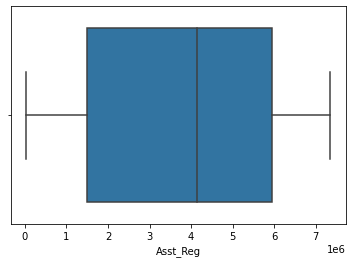

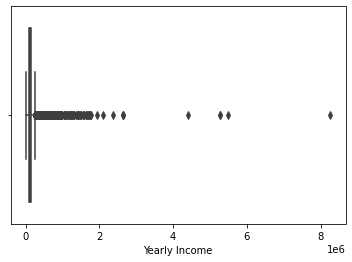

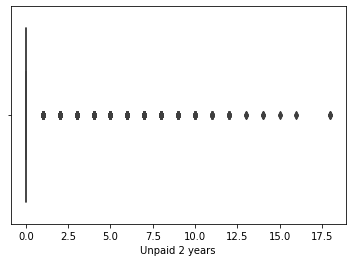

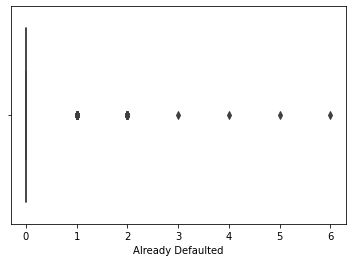

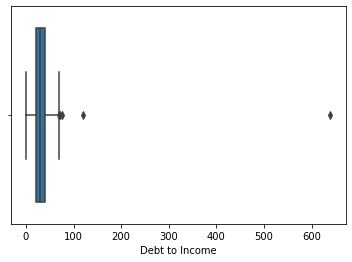

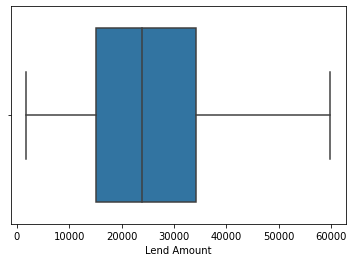

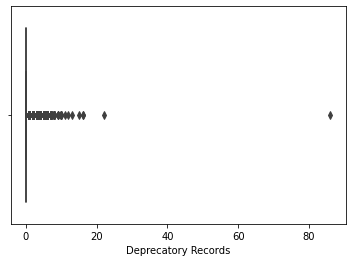

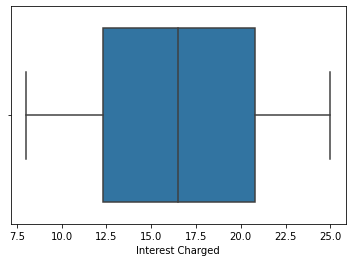

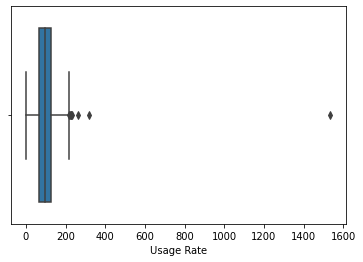

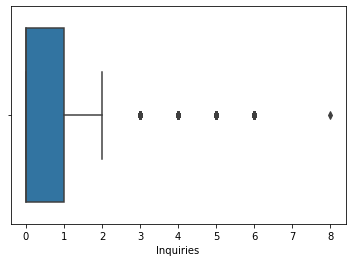

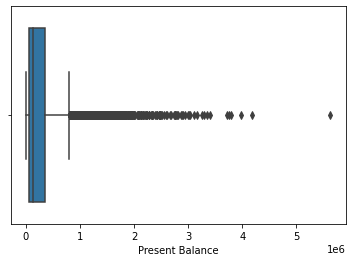

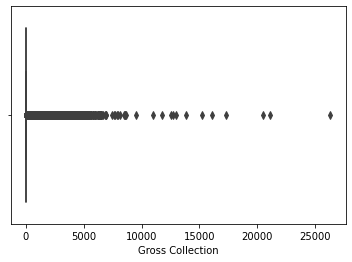

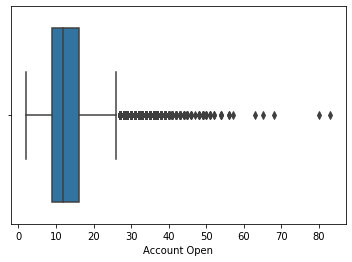

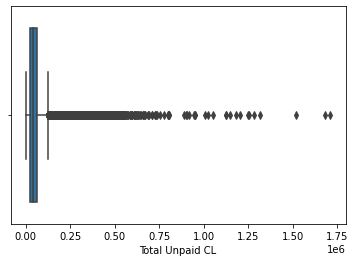

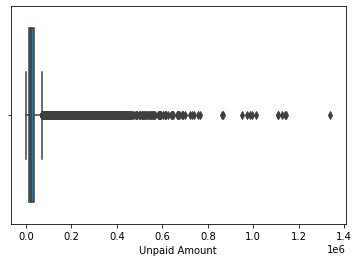

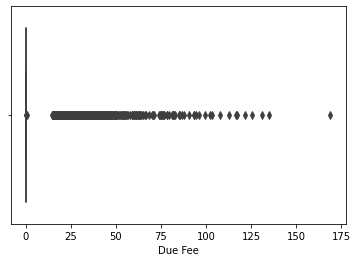

In [ ]:
# Plotting Box plot for checking the Outliers of Numerical Features
for i in df_train_num.columns:
  sns.boxplot(df_train_num[i])
  plt.show()

In [ ]:
# Outliers detected in almost all of the features..Lets treat them during Feature Engineering By Transformation techniques

# 2.Exploratory Data Analysis 

### Target Feature Balance Check

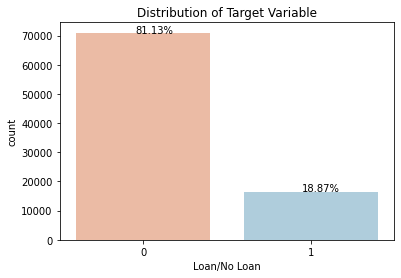

In [ ]:
# Lets check the target variable balance

sns.countplot(df_train['Loan/No Loan'],palette='RdBu')
plt.title('Distribution of Target Variable')
plt.text(x = -0.05, y = df_train['Loan/No Loan'].value_counts()[0] + 1, 
         s = str(round((df_train['Loan/No Loan'].value_counts()[0])*100/len(df_train),2)) + '%')
plt.text(x = 0.95, y = df_train['Loan/No Loan'].value_counts()[1] +1, 
         s = str(round((df_train['Loan/No Loan'].value_counts()[1])*100/len(df_train),2)) + '%')
plt.show()

In [ ]:
# Target Variable Imbalance detected...Lets use SMOTE in future to overcome this issue

### Univariate Analysis

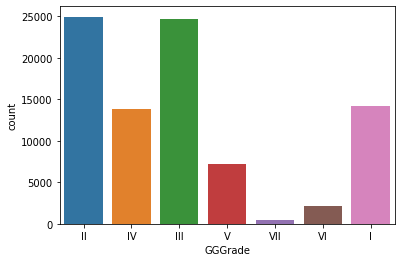

In [ ]:
# Grant Group Grade
sns.countplot(df_train['GGGrade'])
plt.show()

# There are seven Grade Available in this feature..Most of the borrower belong to Grade II and III

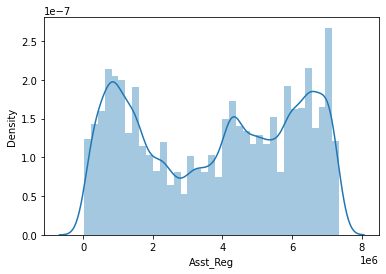

Skewness of Asst_Reg : -0.08665199130289752


In [ ]:
# Value of all the assets registered under the borrowers name
sns.distplot(df_train['Asst_Reg'])
plt.show()
print('Skewness of Asst_Reg :',df_train['Asst_Reg'].skew())

# Normal Distribution detected

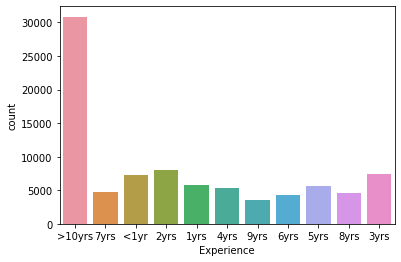

In [ ]:
sns.countplot(df_train['Experience'])
plt.show()

# More Number Borrowers belong to Experienced category(>10) 

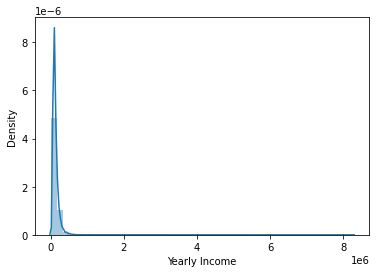

Skewness of Yearly Income 17.39919313700788


In [ ]:
sns.distplot(df_train['Yearly Income'])
plt.show()
print('Skewness of Yearly Income',df_train['Yearly Income'].skew())

# Right Skew detected

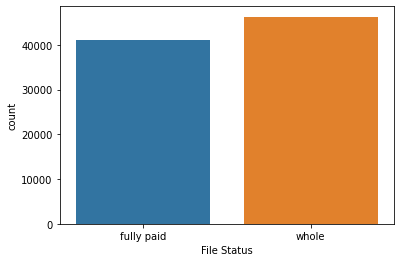

In [ ]:
# File Status
sns.countplot(df_train['File Status'])
plt.show()

# Both categories are equally distributed

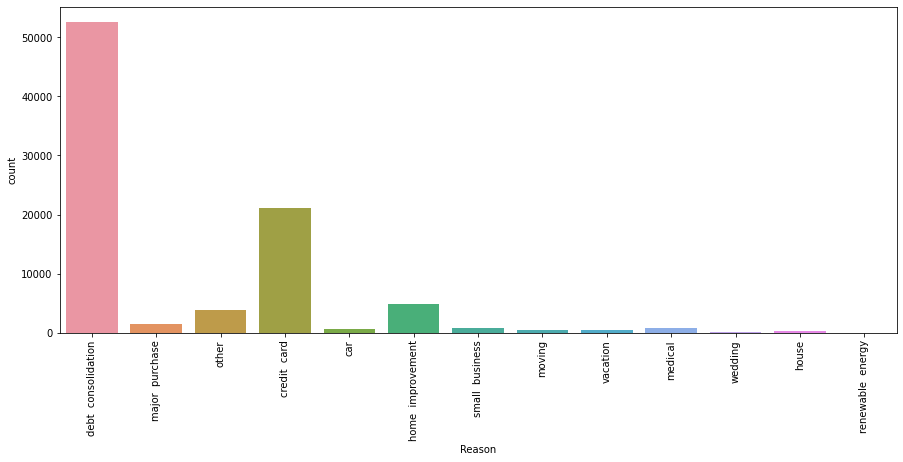

In [ ]:
plt.figure(figsize=(15,6))
sns.countplot(df_train['Reason'])
plt.xticks(rotation=90)
plt.show()

# More Loans have been taken for debt consolidation and credit card

In [ ]:
df_train['Lend Amount'].nunique()

# There are 1298 unique values in Lend Amount

1298

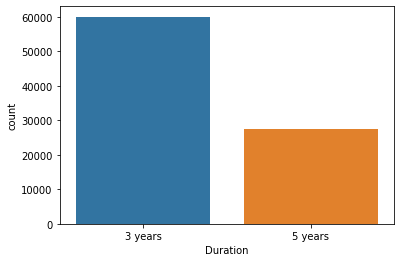

In [ ]:
sns.countplot(df_train['Duration'])
plt.show()

# More Loans have been taken for Short Duration

In [ ]:
df_train['Interest Charged'].nunique()

# There are 1701 unique values in Interest

1701

In [ ]:
df_train['Usage Rate'].nunique()

# There are 1088 unique values in Usage Rate

1088

In [ ]:
df_train['Inquiries'].nunique()

# There are 8 unique values in Inquiries

8

### Bivariate Analysis (Independent Features VS Dependent Feature)

In [ ]:
# Bi-Variate Analysis

GGGrade vs LOAN_DEFAULT


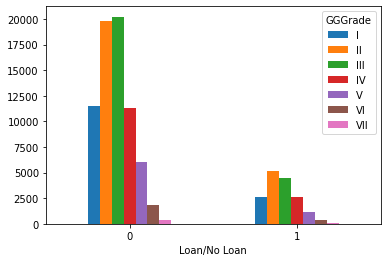

Experience vs LOAN_DEFAULT


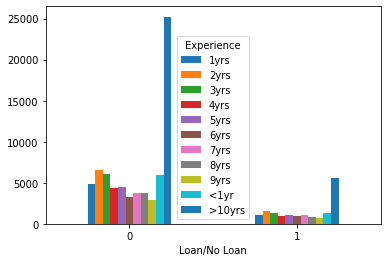

Validation vs LOAN_DEFAULT


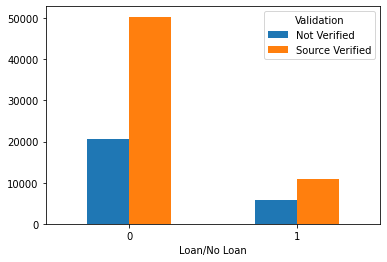

Home Status vs LOAN_DEFAULT


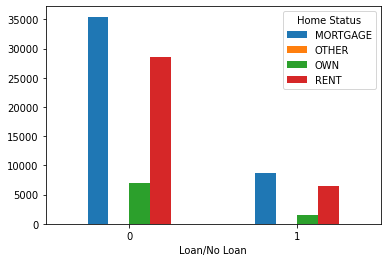

File Status vs LOAN_DEFAULT


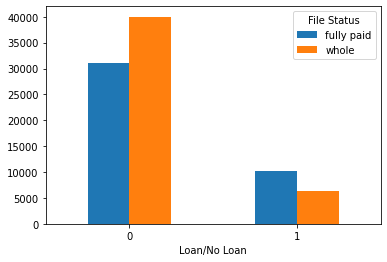

Duration vs LOAN_DEFAULT


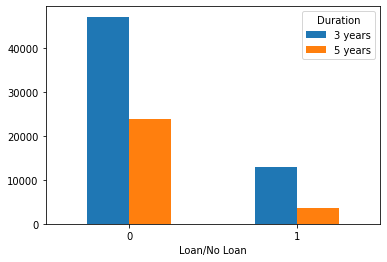

Reason vs LOAN_DEFAULT


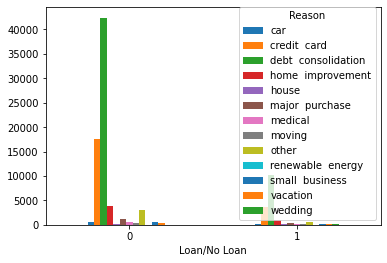

Claim Type vs LOAN_DEFAULT


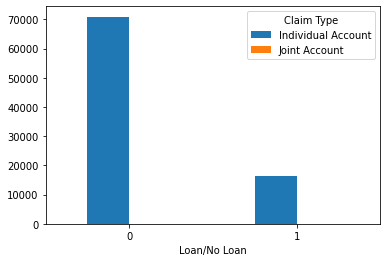

In [ ]:
# Relation Ship of Categorical features with Target Features

for i in df_train_cat.columns:
    pd.crosstab(df_train['Loan/No Loan'],df_train_cat[i]).plot(kind='bar')
    plt.xticks(rotation=0)
    plt.title(print(i ,'vs LOAN_DEFAULT'))
    plt.show()

1. `GGGrade` vs `LOAN_DEFAULT`
    The number of defaulters are comparatively high for the people who are having Grade II and III. 
2. `Experience` vs `LOAN_DEFAULT`
    Most of the people having 1 Year Experience seems to be defaulters.
3. `Validation` vs `LOAN_DEFAULT`
    Some of the Source Verified peoples seems to be defaulters.
4. `Home_Status` vs `LOAN_DEFAULT`
    Number of defaulters are more for the People who are leaving in RENT or MORTGAGE Houses
5. `Duration` vs `LOAN_DEFAULT`
   Short duration of Loan borrowers have defaulted more thaan the long duration.
6.`Reason` vs `LOAN_DEFAULT`
    debt consolidation and credit card reason given peoples are defaulted more.

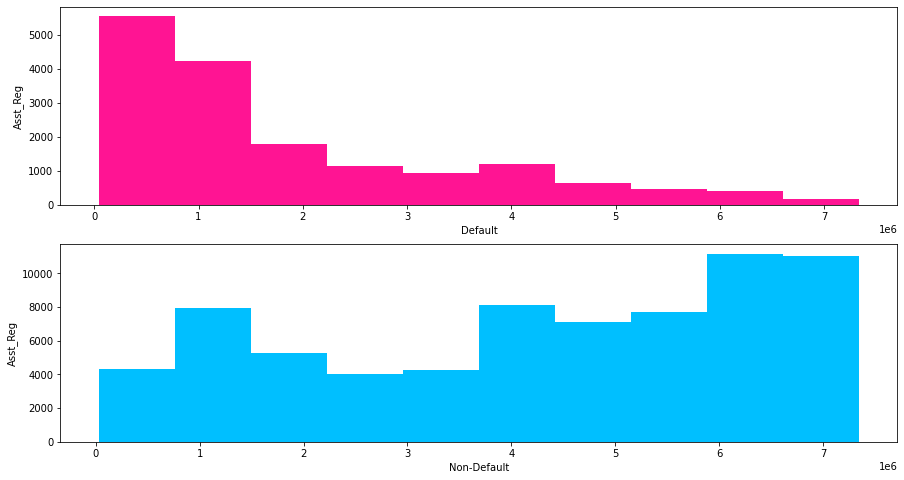

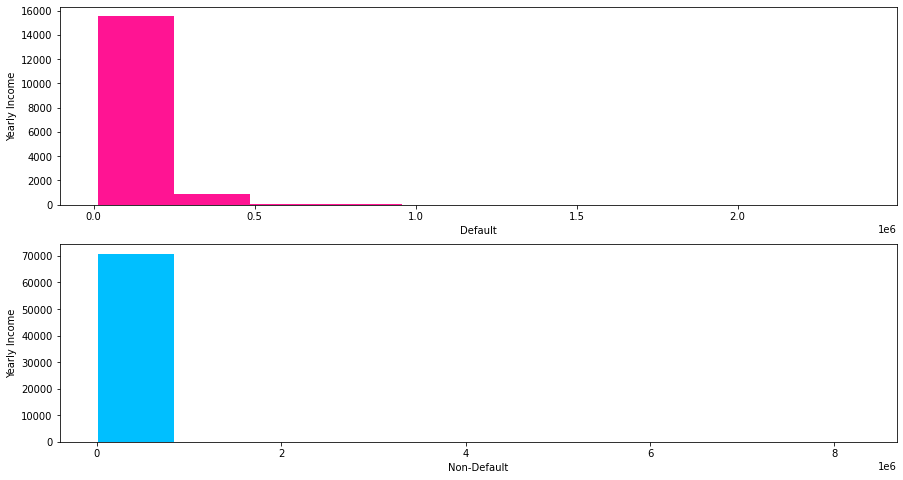

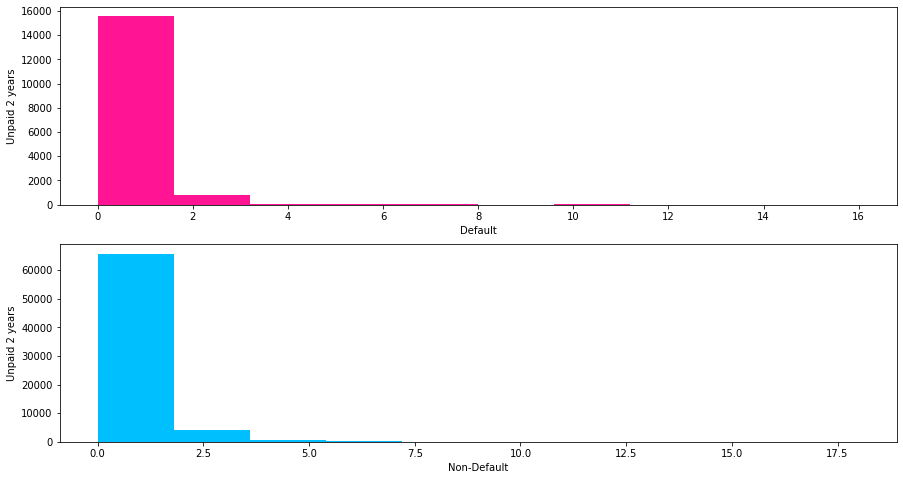

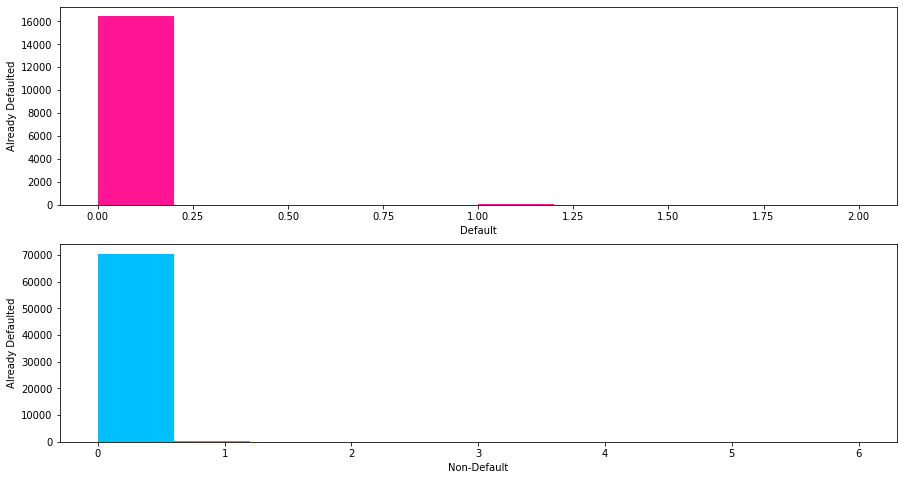

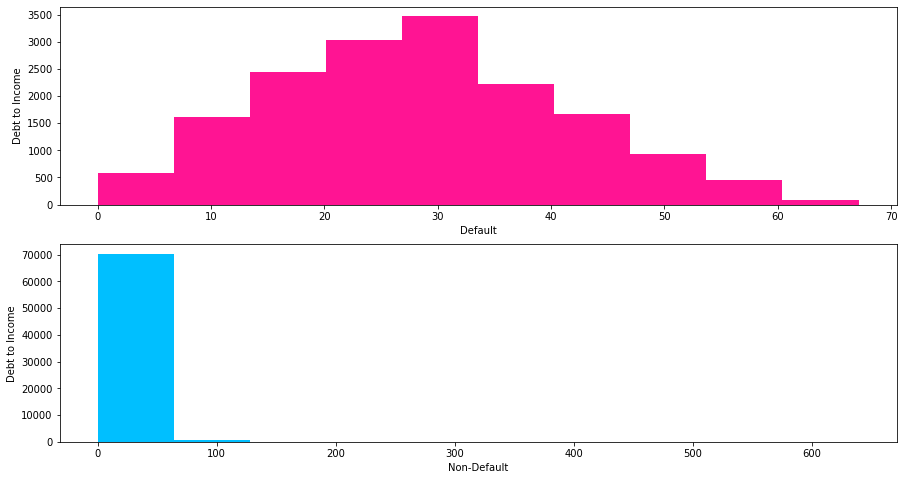

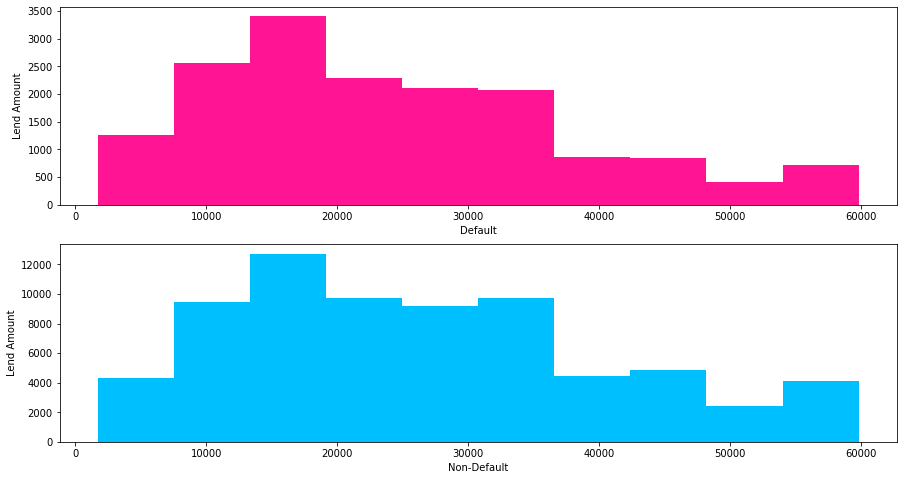

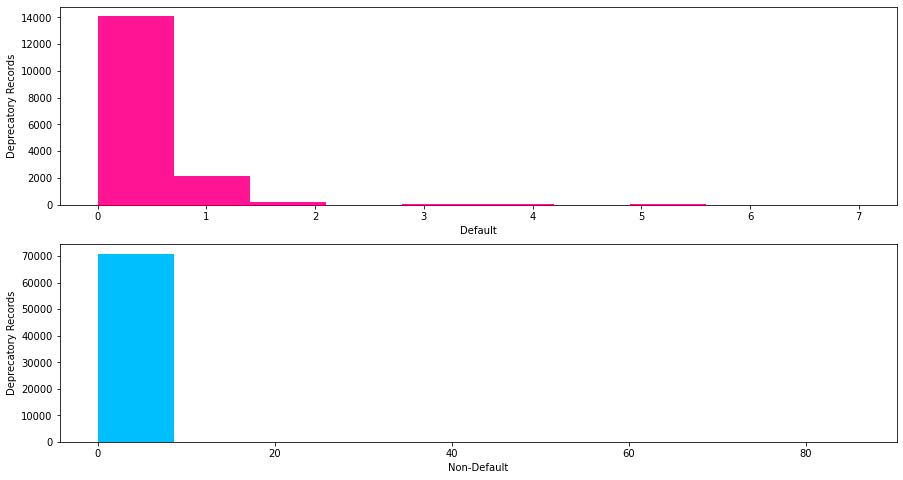

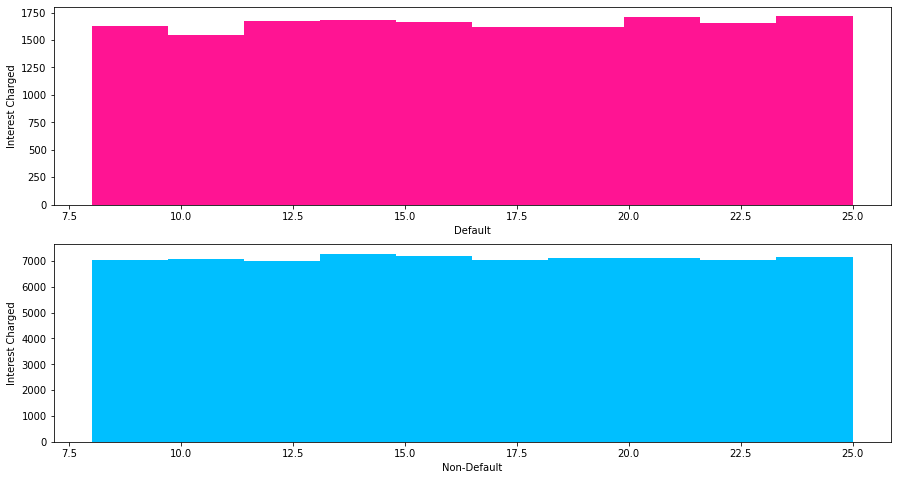

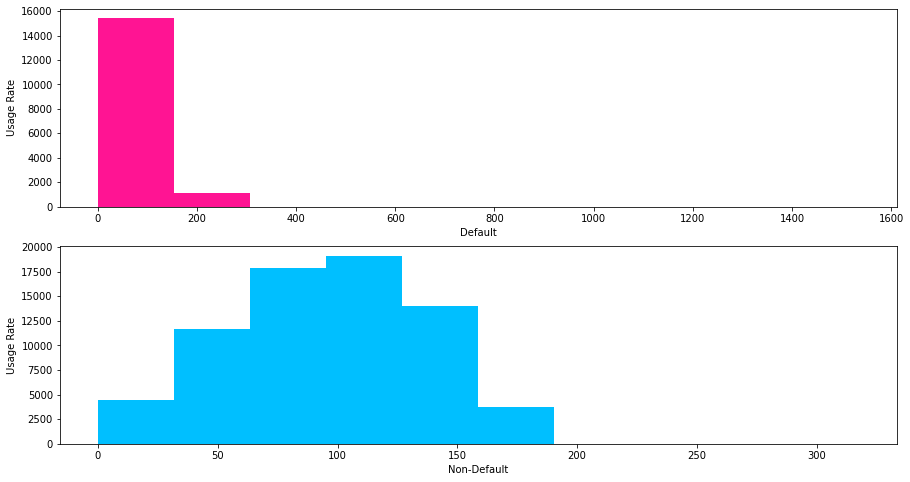

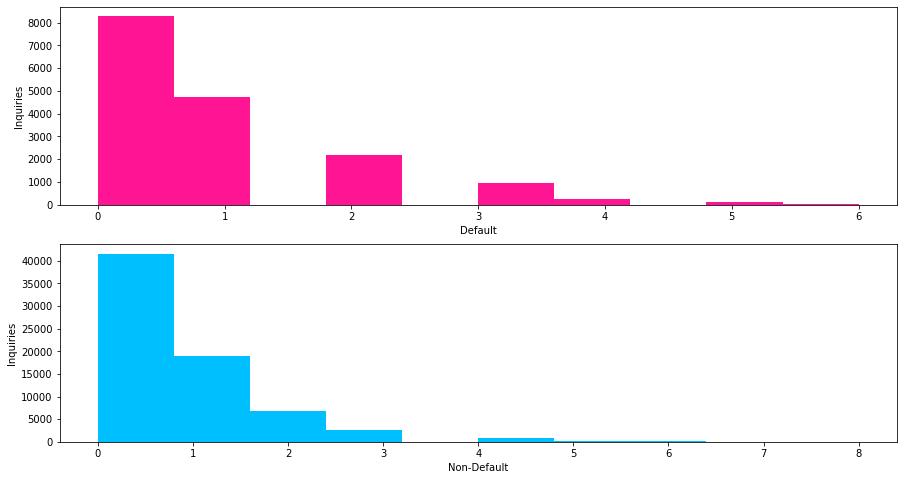

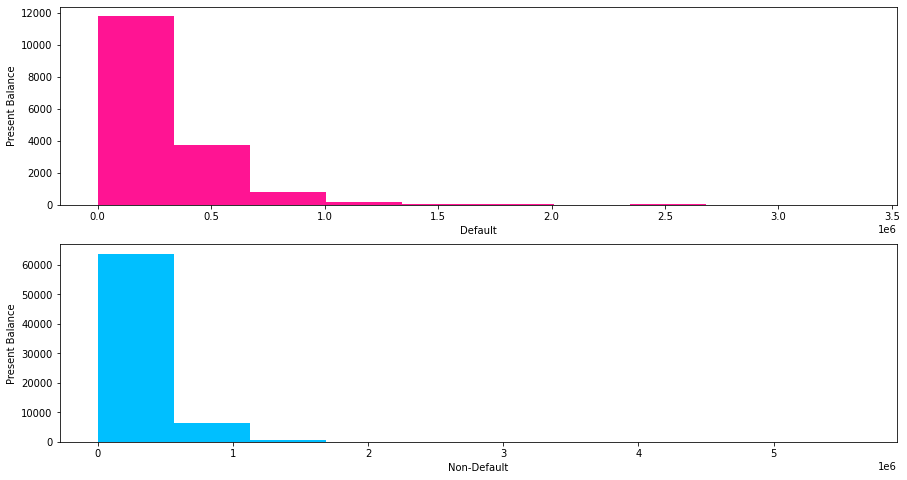

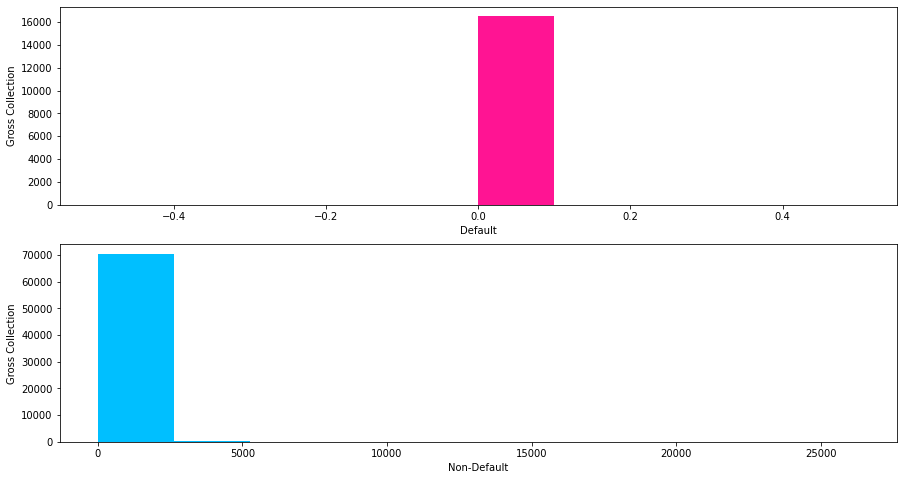

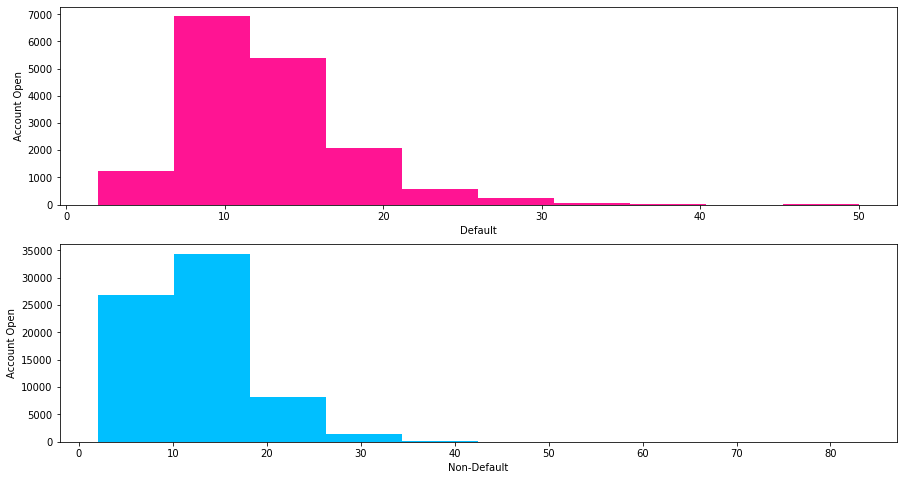

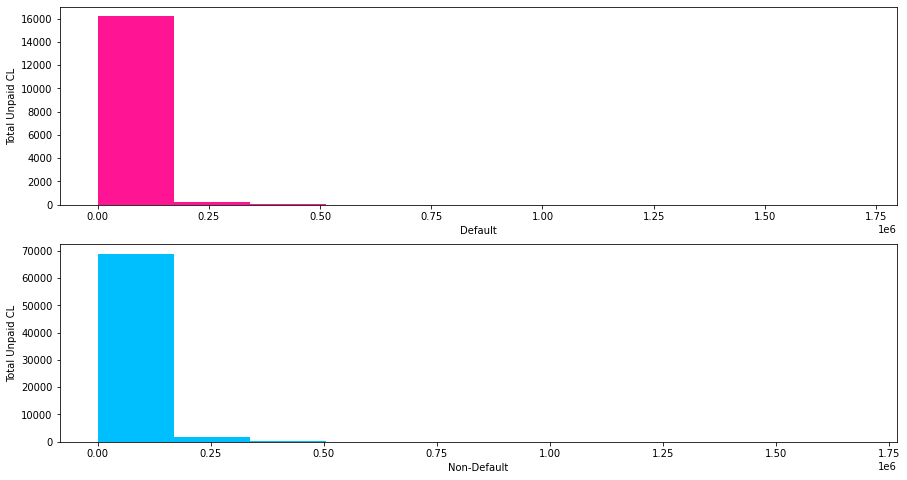

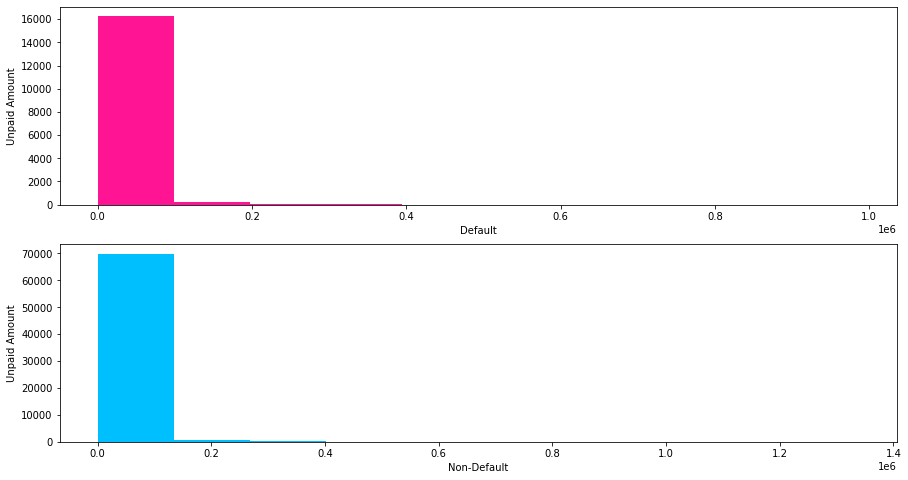

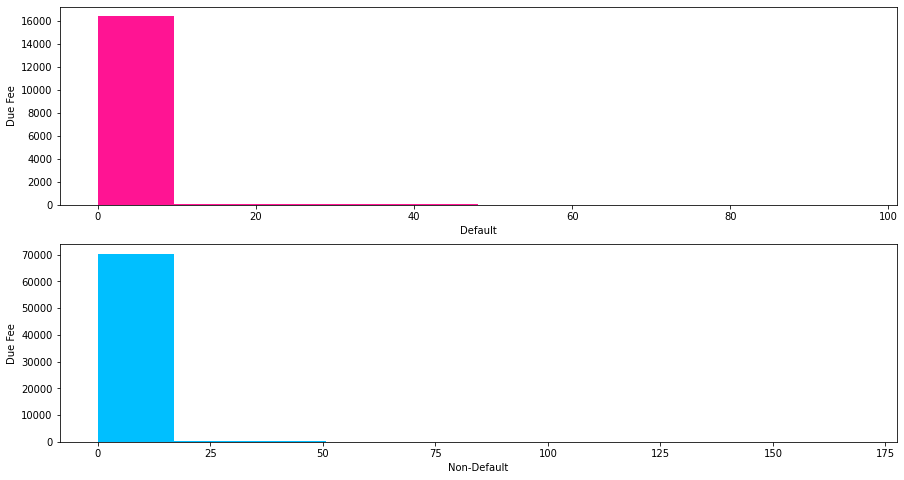

In [ ]:
# RelationShip of Numerical features with Target features

for i in df_train_num.columns:
    f, (ax1, ax2) = plt.subplots(2, 1, figsize=(15,8))

    ax1.hist(df_train_num[i][df_train['Loan/No Loan'] == 1], color = 'deeppink')
    ax1.set(xlabel = 'Default', ylabel=i)

    ax2.hist(df_train_num[i][df_train['Loan/No Loan'] == 0], color = 'deepskyblue')
    ax2.set(xlabel = 'Non-Default', ylabel=i)

### Hypothesis Testing

In [13]:
# Lets Upload the cleaned train data 
uploaded = files.upload()

Saving train_cleaned.csv to train_cleaned.csv


In [15]:
# Lets Upload the cleaned test data 
uploaded = files.upload()

Saving test_cleaned.csv to test_cleaned.csv


In [16]:
# Lets load the cleaned train and test data to do hypothesis testing

df_train_cleaned = pd.read_csv('/content/train_cleaned.csv')
df_test_cleaned = pd.read_csv('/content/test_cleaned.csv')

In [17]:
# Lets take a copy of training data set to do Hypothesis Testing

df_Hypothesis = df_train_cleaned.copy()

In [18]:
# Separating Numerical and Categorical features to conduct respective test
df_hypo_num = df_Hypothesis.select_dtypes(include = np.number).drop('Loan/No Loan',axis=1)
df_hypo_cat = df_Hypothesis.select_dtypes(include ='O')

In [19]:
# categorical vs target
# chi-square test for independence of attributes:
#   H0: variables are independent
#   H1: variables are dependent

c_pvals = []
for i in df_hypo_cat.columns:
    obs = pd.crosstab(df_hypo_cat[i],df_train_cleaned['Loan/No Loan'])
    stat,pval,dof,exp = st.chi2_contingency(obs)
    c_pvals.append(pval)
    
pd.DataFrame({'Features':df_hypo_cat.columns,'p_value':c_pvals})

,Features,p_value
0,GGGrade,2.144329e-24
1,Experience,9.923110e-18
2,Validation,1.017556e-43
3,Home Status,2.205921e-15
4,File Status,0.000000e+00
5,Duration,7.782946e-199
6,Reason,4.229150e-39
7,Claim Type,2.046206e-03


In [ ]:
# All p_values < 0.05(alpha), Rejecting Null Hypothesis, so all the categorical features have some relationship with Target Variable

In [20]:
# numerical vs target
# Two tailed Two-Sample T-Test:
#   H0: mean1 = mean2
#   H1: mean1 !=mean2

n_pvals = []
for i in df_hypo_num.columns:
    a=df_train_cleaned[df_train_cleaned['Loan/No Loan'] == 0][i]
    b=df_train_cleaned[df_train_cleaned['Loan/No Loan'] == 1][i]
    tstat,pval = st.ttest_ind(a,b)
    n_pvals.append(pval)
    
pd.DataFrame({'Features':df_hypo_num.columns,'p_value':n_pvals})

,Features,p_value
0,Asst_Reg,0.000000e+00
1,Yearly Income,4.370882e-01
2,Unpaid 2 years,6.548875e-19
3,Already Defaulted,1.485307e-02
4,Debt to Income,4.037012e-153
5,Lend Amount,2.011377e-69
6,Deprecatory Records,5.093212e-10
7,Interest Charged,7.650118e-02
8,Usage Rate,2.652506e-22
9,Inquiries,9.771760e-113


In [ ]:
# All p_values < 0.05(alpha), Rejecting Null Hypothesis, so all the Numerical features have some relationship with Target Variable

# 3.Feature Engineering

In [173]:
# Reading the cleaned train and test data 
df_train_cleaned = pd.read_csv('/content/train_cleaned.csv')
df_test_cleaned = pd.read_csv('/content/test_cleaned.csv')

### Correlation Coefficient Check

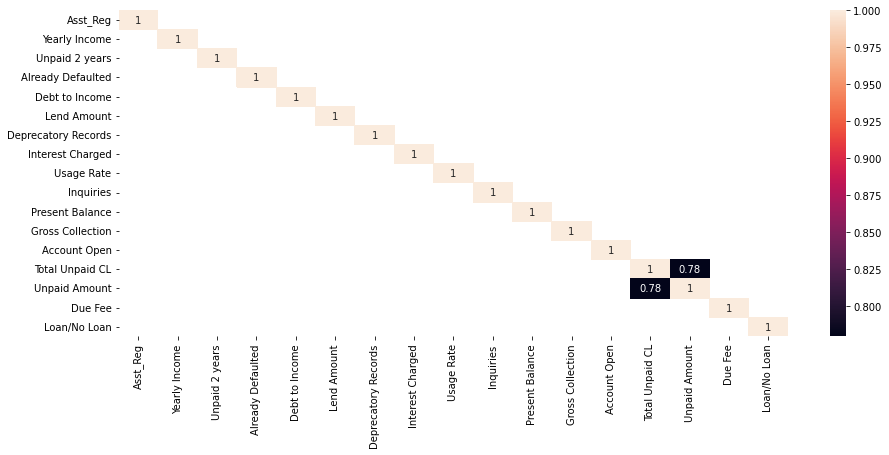

In [21]:
# Lets check the correlation Between the Numerical Features - Linear Relation between Two Numerical Features

plt.figure(figsize=(15,6))
sns.heatmap(df_train_cleaned.corr()[(df_train_cleaned.corr()>0.5) | (df_train_cleaned.corr()< - 0.5)],annot=True)
plt.show()

### Extracting New Features Based on Domain Knowledge

In [22]:
# Total Unpaid CL and Unpaid Amount are correlated with each other..Lets remove them after building base models

In [7]:
# Lets create new feature 'age' using Experience feature

# Lets assume People complete their graduation at Age 21

In [10]:
df_train_cleaned['Experience'].value_counts()

>10yrs    30849
2yrs       8064
3yrs       7350
<1yr       7209
1yrs       5853
5yrs       5623
4yrs       5324
7yrs       4762
8yrs       4604
6yrs       4255
9yrs       3607
Name: Experience, dtype: int64

In [23]:
# User define function for calculating age
def calculate_age(x):
  default_age = 21
  if x == '<1yr':
    return default_age
  if x == '1yrs':
    return default_age + 1
  if x == '2yrs':
    return default_age + 2
  if x == '3yrs':
    return default_age + 3
  if x == '4yrs':
    return default_age + 4
  if x == '5yrs':
    return default_age + 5
  if x == '6yrs':
    return default_age + 6
  if x == '7yrs':
    return default_age + 7
  if x == '8yrs':
    return default_age + 8
  if x == '9yrs':
    return default_age + 9
  if x == '>10yrs':
    return default_age + int(np.random.randint(30,50,1))

In [24]:
df_train_cleaned['age'] = df_train_cleaned['Experience'].apply(calculate_age)
df_test_cleaned['age'] = df_test_cleaned['Experience'].apply(calculate_age)

In [25]:
# We can create another new feature called Number of dependents

# Lets assume each individual wil have 2 dependents(Father and Mother) by default

def calculate_dependents(x):
  if x < 26:
    return int(np.random.randint(0,3,1)) #(Father and Mother)
  if x > 27 and x<=30:
    return int(np.random.randint(3,6,1)) # (Wife and Father in law and Mother in Law)
  else :
    return int(np.random.randint(7,13,1)) # (Includes Childrens)

In [26]:
df_train_cleaned['Number of dependents'] = df_train_cleaned['age'].apply(calculate_dependents)
df_test_cleaned['Number of dependents'] = df_test_cleaned['age'].apply(calculate_dependents)

In [27]:
# Lets create another feature Marital Status of the Applicant

# If age < 27 ,then Unmarried else Married
df_train_cleaned['Marital_Status'] = df_train_cleaned['age'].apply(lambda x : 'Unmarried' if x < 27 else 'Married')
df_test_cleaned['Marital_Status'] = df_test_cleaned['age'].apply(lambda x : 'Unmarried' if x < 27 else 'Married')

In [28]:
df_train_cleaned['Marital_Status'].value_counts()

Married      48077
Unmarried    39423
Name: Marital_Status, dtype: int64

In [207]:
# Taking a copy of Feature Engineering data set
df_train_cleaned.to_csv('fe_train.csv',index=False)
df_test_cleaned.to_csv('fe_test.csv',index=False)

In [29]:
# Lets calculate Monthly Income by YearlyIncome/12

df_train_cleaned['Monthly_Income'] = df_train_cleaned['Yearly Income'].apply(lambda x : x/12)
df_test_cleaned['Monthly_Income'] = df_test_cleaned['Yearly Income'].apply(lambda x : x/12)

### Feature Transformation

In [30]:
# Lets separate Numerical and categorical features to treat outliers

df_train_num = df_train_cleaned.select_dtypes(include = np.number).drop('Loan/No Loan',axis=1)
df_train_cat = df_train_cleaned.select_dtypes(include ='O')

df_test_num = df_test_cleaned.select_dtypes(include = np.number)
df_test_cat = df_test_cleaned.select_dtypes(include ='O')

In [31]:
# As we have already seen above,Most of the features have outliers ..so lets do square root transformation

# We cannot carry out Log or Box Cox Transformation, as we have some values as zero

df_train_num = np.sqrt(df_train_num)
df_test_num = np.sqrt(df_test_num)

In [32]:
# Concatenating Numerical and Categorical after SQRT transformation

df_train_new = pd.concat([df_train_num,df_train_cleaned['Loan/No Loan'],df_train_cat],axis=1)
df_test_new = pd.concat([df_test_num,df_test_cat],axis=1)

### Dummy Encoding Categorical Features

In [33]:
# Separating Numerical and Categorical for Dummy Encoding
df_train_num = df_train_new.select_dtypes(include =np.number).drop('Loan/No Loan',axis=1)
df_train_cat = df_train_new.select_dtypes(include ='O')

df_test_num = df_test_new.select_dtypes(include =np.number)
df_test_cat = df_test_new.select_dtypes(include ='O')

In [34]:
# Carrying out Dummy(n-1) or One Hot Encoding for Categorical Features
train_encode = pd.get_dummies(df_train_cat,drop_first=True)
test_encode = pd.get_dummies(df_test_cat,drop_first=True)

In [35]:
# Now Concatenating Dummy Encoded and Scaled Numerical Features
X_train = pd.concat([df_train_num,train_encode],axis=1)
X_test = pd.concat([df_test_num,test_encode],axis=1)

# Target Variable
y_train = df_train_cleaned['Loan/No Loan']

### Feature Scaling

In [52]:
# Carrying out Standard Scaler(Z Scale) formula = (x-mu/std)
ss = StandardScaler()

X_train_scaled = pd.DataFrame(ss.fit_transform(X_train),columns = X_train.columns)
X_test_scaled = pd.DataFrame(ss.transform(X_test),columns = X_test.columns)

In [ ]:
# Saving this df to use it in future

# Taking a copy of cleaned train and test set
X_train_scaled.to_csv('train_scaled.csv',index=False)
X_test_scaled.to_csv('test_scaled.csv',index=False)

In [ ]:
# Reading the Scaled data of Train and Test
X_train_scaled = pd.read_csv('/content/train_scaled.csv')
X_test_scaled = pd.read_csv('/content/test_scaled.csv')

# 4.Model Building 

In [36]:
# Uploading Sample Submission File

uploaded = files.upload()

Saving Sample_Submission.csv to Sample_Submission.csv


In [37]:
# User defined Function for printing Accuracy and Classification report
def print_metrics(model,X_ind,y_dep):
  # Accuracy of Training set
  print('Accuracy score :',model.score(X_ind,y_dep))
  print('\n')
  # Due to Accuracy Paradox, we should not judge accuracy score
  # Predicting target variable using the above model
  train_pred = model.predict(X_ind)

  # Printing the classification report
  print('Classification Report : \n\n', metrics.classification_report(y_dep,train_pred))

In [38]:
# User defined Function for Plotting ROC AUC Curve
def plot_roc_curve(model,X_ind,y_dep):
  # Retrieving Probability 
  y_train_pred_prob = model.predict_proba(X_ind)
  y_train_pred_prob = y_train_pred_prob[:,1]

  # Plotting ROC AUC Score
  fpr,tpr,threshold = metrics.roc_curve(y_dep,y_train_pred_prob)


  plt.plot(fpr,tpr)
  plt.plot([0,1],[0,1],'k--')
  plt.xlabel('FPR')
  plt.ylabel('TPR')
  plt.title('ROC AUC Score')
  plt.show()

  print('ROC AUC SCORE :',metrics.roc_auc_score(y_dep,y_train_pred_prob))

In [39]:
# User defined function for finding the best threshold using Youdens Index
def find_best_threshold(model,X_ind,y_dep):
  # Retrieving Probability 
  y_train_pred_prob = model.predict_proba(X_ind)
  y_train_pred_prob = y_train_pred_prob[:,1]

  # Plotting ROC AUC Score
  fpr,tpr,threshold = metrics.roc_curve(y_dep,y_train_pred_prob)

  # create a dataframe to store the values for false positive rate, true positive rate and threshold
  youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': threshold})

  # calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
  youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

  # sort the dataframe based on the values of difference 
  # 'ascending = False' sorts the data in descending order
  # 'reset_index' resets the index of the dataframe
  # 'drop = True' drops the previous index
  youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

  # print the first five observations
  print(youdens_table.head())
  threshold = youdens_table.iloc[0,2]
  print('\n\n')
  print('Best Threshold where MAX(TPR - FPR ) is higher :',threshold)
  print('\n\n')
  # Max(TPR - FPR) would be taken

  # Making 0 if prob < 0.152263 else 1
  y_train_pred = [0 if x < threshold else 1 for x in y_train_pred_prob]

  # Displaying classification report for traning data
  print('Classification Report for best Threshold :\n')
  print(metrics.classification_report(y_dep,y_train_pred))

In [40]:
# Code Snippet for sample submission(base model)

def submit_base_model(model):
  y_test_pred = model.predict(X_test_scaled)
  df_sample_file = pd.read_csv('/content/Sample_Submission.csv')
  df_sample_file['Target'] = y_test_pred
  df_sample_file = df_sample_file.drop('Loan/No Loan',axis=1)
  df_sample_file = df_sample_file.rename(columns = {'Target':'Loan/No Loan'})

  # Delete the existing final file before executing this code
  df_sample_file.to_csv('final.csv',index=False)

In [41]:
# Code Snippet for sample submission(best features)

def submit_best_model(model,best_features):
  y_test_pred = model.predict(X_test_scaled[best_features])
  df_sample_file = pd.read_csv('/content/Sample_Submission.csv')
  df_sample_file['Target'] = y_test_pred
  df_sample_file = df_sample_file.drop('Loan/No Loan',axis=1)
  df_sample_file = df_sample_file.rename(columns = {'Target':'Loan/No Loan'})

  # Delete the existing final file before executing this code
  df_sample_file.to_csv('final.csv',index=False)

In [42]:
# Code Snippet for sample submission(best threshold model)

def submit_best_threshold_model(model,threshold):
  y_test_pred_prob = model.predict_proba(X_test_scaled)
  y_test_pred_prob = y_test_pred_prob[:,1]
  y_test_pred = [0 if x < threshold else 1 for x in y_test_pred_prob]
  df_sample_file = pd.read_csv('/content/Sample_Submission.csv')
  df_sample_file['Target'] = y_test_pred
  df_sample_file = df_sample_file.drop('Loan/No Loan',axis=1)
  df_sample_file = df_sample_file.rename(columns = {'Target':'Loan/No Loan'})

  # Delete the existing final file before executing this code
  df_sample_file.to_csv('final.csv',index=False)

In [43]:
# Code Snippet for sample submission(best threshold with best features model)

def submit_best_threshold_features_model(model,threshold,best_features):
  y_test_pred_prob = model.predict_proba(X_test_scaled[best_features])
  y_test_pred_prob = y_test_pred_prob[:,1]
  y_test_pred = [0 if x < threshold else 1 for x in y_test_pred_prob]
  df_sample_file = pd.read_csv('/content/Sample_Submission.csv')
  df_sample_file['Target'] = y_test_pred
  df_sample_file = df_sample_file.drop('Loan/No Loan',axis=1)
  df_sample_file = df_sample_file.rename(columns = {'Target':'Loan/No Loan'})

  # Delete the existing final file before executing this code
  df_sample_file.to_csv('final.csv',index=False)

In [45]:
# user defined function for updating dashboard 

score_card = pd.DataFrame(columns=['Model Name','Accuracy','ROC_AUC_SCORE','Train_f1','Test_f1'])
def update_scorecard(name,acc,roc_score,train_f1,test_f1):
    global score_card
    score_card = score_card.append({'Model Name':name, 'Accuracy':acc,'ROC_AUC_SCORE':roc_score,'Train_f1':train_f1,'Test_f1':test_f1},
                                  ignore_index=True)

### Model 1 - Logistic Regression

In [58]:
# Initializing the logistic Regression
logreg = LogisticRegression()

# Fitting the Model
logreg.fit(X_train_scaled,y_train)

LogisticRegression()

In [257]:
# Printing the Metrics
print_metrics(logreg,X_train_scaled,y_train)

# Due to Accuracy Paradox, we should not judge accuracy score

Accuracy score : 0.7481485714285714


Classification Report : 

               precision    recall  f1-score   support

           0       0.93      0.75      0.83     70988
           1       0.41      0.76      0.53     16512

    accuracy                           0.75     87500
   macro avg       0.67      0.75      0.68     87500
weighted avg       0.83      0.75      0.77     87500



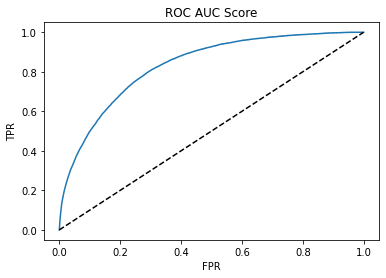

ROC AUC SCORE : 0.8313809181377636


In [258]:
# Plotting the ROC AUC Curve
plot_roc_curve(logreg,X_train_scaled,y_train)

# ROC AUC Score is 0.83 which can be further improved by other models

In [ ]:
# ROC AUC Score Looks Good. Yet we can improve with other models..Lets take the best threshold and predict the target feature

In [259]:
# Finding the best threshold using Youdens Index
find_best_threshold(logreg,X_train_scaled,y_train)

        TPR       FPR  Threshold  Difference
0  0.794755  0.287443   0.443275    0.507312
1  0.794816  0.287513   0.443233    0.507303
2  0.802992  0.295712   0.430722    0.507280
3  0.795240  0.287978   0.442548    0.507262
4  0.795300  0.288049   0.442286    0.507252



Best Threshold where MAX(TPR - FPR ) is higher : 0.4432746015083958



Classification Report for best Threshold :

              precision    recall  f1-score   support

           0       0.94      0.71      0.81     70988
           1       0.39      0.79      0.52     16512

    accuracy                           0.73     87500
   macro avg       0.66      0.75      0.67     87500
weighted avg       0.83      0.73      0.76     87500



In [260]:
submit_best_threshold_model(logreg,0.44327)
# 0.571651023

In [46]:
# Updating the Score card
update_scorecard('Base Logistic Regression',0.74,0.83,0.52,0.5716)

In [47]:
score_card

,Model Name,Accuracy,ROC_AUC_SCORE,Train_f1,Test_f1
0,Base Logistic Regression,0.74,0.83,0.52,0.5716


###  Model 2 - Ridge Classifier

In [267]:
# Initializing the Ridge Regression
reg = RidgeClassifier(alpha=100)

# Fitting the training set
reg.fit(X_train_scaled,y_train)

RidgeClassifier(alpha=100)

In [268]:
# Priting the Accuracy and Classification Report
print_metrics(reg,X_train_scaled,y_train)

Accuracy score : 0.8381371428571428


Classification Report : 

               precision    recall  f1-score   support

           0       0.85      0.98      0.91     70988
           1       0.72      0.23      0.35     16512

    accuracy                           0.84     87500
   macro avg       0.78      0.61      0.63     87500
weighted avg       0.82      0.84      0.80     87500



In [ ]:
# This Model is not contributing Much...Lets try with SMOTE and Build Model

In [269]:
submit_base_model(reg)
# 0.31

In [48]:
update_scorecard('Base Ridge Classifier',0.83813,'-',0.35,0.31)

In [49]:
score_card

,Model Name,Accuracy,ROC_AUC_SCORE,Train_f1,Test_f1
0,Base Logistic Regression,0.74000,0.83,0.52,0.5716
1,Base Ridge Classifier,0.83813,-,0.35,0.3100


### SMOTE - Synthetic Minority OverSampling Technique

In [50]:
# Lets do SMOTE to balance the Target Feature

In [53]:
oversample = SMOTE()

X,y = oversample.fit_resample(X_train_scaled,y_train)

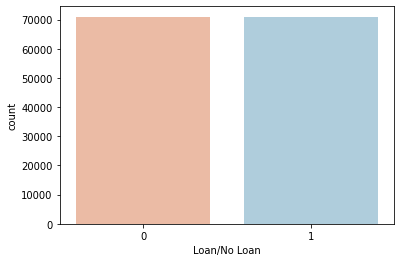

In [216]:
# Now Target Variable is balanced
sns.countplot(y,palette='RdBu')
plt.show()

### Model 3 - Logistic Regression(AFTER SMOTE)

In [276]:
# Trying Logistic Regression again after doing SMOTE
logreg = LogisticRegression()

logreg.fit(X,y)

LogisticRegression()

In [277]:
# Printing the Metrics of above Logistic Model
print_metrics(logreg,X,y)

Accuracy score : 0.7657420972558743


Classification Report : 

               precision    recall  f1-score   support

           0       0.77      0.75      0.76     70988
           1       0.76      0.78      0.77     70988

    accuracy                           0.77    141976
   macro avg       0.77      0.77      0.77    141976
weighted avg       0.77      0.77      0.77    141976



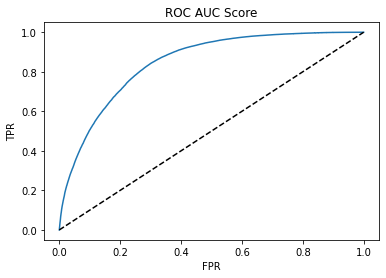

ROC AUC SCORE : 0.8461461658840743


In [ ]:
plot_roc_curve(logreg,X,y)

In [278]:
find_best_threshold(logreg,X,y)

        TPR       FPR  Threshold  Difference
0  0.838128  0.295219   0.408335    0.542909
1  0.838142  0.295275   0.408308    0.542866
2  0.838057  0.295191   0.408400    0.542866
3  0.838071  0.295205   0.408383    0.542866
4  0.838128  0.295275   0.408309    0.542852



Best Threshold where MAX(TPR - FPR ) is higher : 0.4083346081704814



Classification Report for best Threshold :

              precision    recall  f1-score   support

           0       0.81      0.70      0.76     70988
           1       0.74      0.84      0.79     70988

    accuracy                           0.77    141976
   macro avg       0.78      0.77      0.77    141976
weighted avg       0.78      0.77      0.77    141976



In [279]:
submit_best_threshold_model(logreg,0.408335)
# 0.5734439834

In [54]:
update_scorecard('SMOTE - Logistic Regression',0.7657,0.84,0.79,0.57344)
score_card

,Model Name,Accuracy,ROC_AUC_SCORE,Train_f1,Test_f1
0,Base Logistic Regression,0.74000,0.83,0.52,0.57160
1,Base Ridge Classifier,0.83813,-,0.35,0.31000
2,SMOTE - Logistic Regression,0.76570,0.84,0.79,0.57344


### Recursive Feature Elimination

In [55]:
# Initializing and Fitting the train set to retrieve the best set
rfe_model = RFE(estimator = LogisticRegression(),n_features_to_select=40)
rfe_model.fit(X,y)

RFE(estimator=LogisticRegression(), n_features_to_select=40)

In [56]:
# We are extracting the best features as per the rankings 
best_feature =  pd.DataFrame()

best_feature['Features'] = X_train.columns
best_feature['Ranking']= rfe_model.ranking_

best_features_list = list(best_feature[best_feature['Ranking'] ==1]['Features'])

In [57]:
# Printing the best features list
best_features_list

['Asst_Reg',
 'Yearly Income',
 'Unpaid 2 years',
 'Debt to Income',
 'Lend Amount',
 'Deprecatory Records',
 'Interest Charged',
 'Usage Rate',
 'Inquiries',
 'Present Balance',
 'Gross Collection',
 'Account Open',
 'Unpaid Amount',
 'Due Fee',
 'age',
 'Number of dependents',
 'Monthly_Income',
 'GGGrade_II',
 'GGGrade_III',
 'GGGrade_IV',
 'GGGrade_V',
 'GGGrade_VI',
 'GGGrade_VII',
 'Experience_2yrs',
 'Experience_5yrs',
 'Experience_7yrs',
 'Experience_9yrs',
 'Experience_<1yr',
 'Experience_>10yrs',
 'Home Status_OTHER',
 'Home Status_OWN',
 'Duration_5 years',
 'Reason_credit  card',
 'Reason_debt  consolidation',
 'Reason_home  improvement',
 'Reason_house',
 'Reason_renewable  energy',
 'Reason_small  business',
 'Claim Type_Joint Account',
 'Marital_Status_Unmarried']

### Model 4 - Logistic Regression With Best Features

In [59]:
# Fitting the Train set
logreg_best = LogisticRegression()

logreg_best.fit(X[best_features_list],y)


LogisticRegression()

In [124]:
print_metrics(logreg_best,X[best_features_list],y)

Accuracy score : 0.7669465261734377


Classification Report : 

               precision    recall  f1-score   support

           0       0.77      0.75      0.76     70988
           1       0.76      0.78      0.77     70988

    accuracy                           0.77    141976
   macro avg       0.77      0.77      0.77    141976
weighted avg       0.77      0.77      0.77    141976



In [125]:
submit_best_model(logreg_best,best_features_list)
# F1 score - 0.5736820257

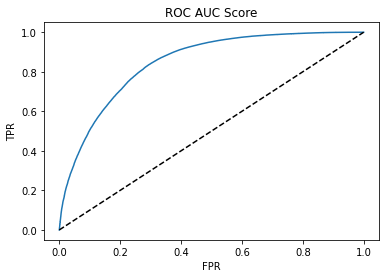

ROC AUC SCORE : 0.8459883355091029


In [ ]:
plot_roc_curve(logreg_best,X[best_features_list],y)

In [ ]:
find_best_threshold(logreg_best,X[best_features_list],y)

        TPR       FPR  Threshold  Difference
0  0.835141  0.293500   0.412940    0.541641
1  0.835155  0.293514   0.412933    0.541641
2  0.834986  0.293345   0.413116    0.541641
3  0.835014  0.293374   0.413100    0.541641
4  0.835000  0.293359   0.413107    0.541641



Best Threshold where MAX(TPR - FPR ) is higher : 0.4129398021070694



Classification Report for best Threshold :

              precision    recall  f1-score   support

           0       0.81      0.71      0.76     70988
           1       0.74      0.84      0.78     70988

    accuracy                           0.77    141976
   macro avg       0.78      0.77      0.77    141976
weighted avg       0.78      0.77      0.77    141976



In [ ]:
submit_best_threshold_features_model(logreg_best,0.41294,best_features_list)
# 0.569

In [60]:
update_scorecard('RFE-Logistic Regression',0.76,0.84,0.78,0.5736820257)

### Model 5 - Decision Tree 

In [ ]:
dt = DecisionTreeClassifier(max_depth = 3,random_state=10)

dt.fit(X[best_features_list],y)

dt.score(X[best_features_list],y)

0.7644320166788753

In [ ]:
print_metrics(dt,X[best_features_list],y)

Accuracy score : 0.7644320166788753


Classification Report : 

               precision    recall  f1-score   support

           0       0.81      0.70      0.75     70988
           1       0.73      0.83      0.78     70988

    accuracy                           0.76    141976
   macro avg       0.77      0.76      0.76    141976
weighted avg       0.77      0.76      0.76    141976



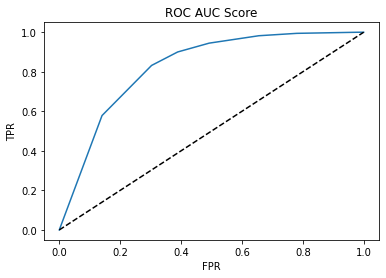

ROC AUC SCORE : 0.8247891867694133


In [ ]:
plot_roc_curve(dt,X[best_features_list],y)

In [ ]:
submit_best_model(dt,best_features_list)
# 0.5584661313

In [ ]:
find_best_threshold(dt,X[best_features_list],y)

        TPR       FPR  Threshold  Difference
0  0.832056  0.303192   0.608981    0.528864
1  0.900223  0.388911   0.442970    0.511312
2  0.944878  0.492435   0.301359    0.452443
3  0.578548  0.140418   0.804695    0.438130
4  0.982335  0.655618   0.186688    0.326717



Best Threshold where MAX(TPR - FPR ) is higher : 0.6089810835504721



Classification Report for best Threshold :

              precision    recall  f1-score   support

           0       0.81      0.70      0.75     70988
           1       0.73      0.83      0.78     70988

    accuracy                           0.76    141976
   macro avg       0.77      0.76      0.76    141976
weighted avg       0.77      0.76      0.76    141976



In [ ]:
submit_best_threshold_features_model(dt,0.6089,best_features_list)
# 0.55

In [61]:
update_scorecard('RFE-Decision Tree',0.76,0.82,0.78,0.5584661313)

### Model 6 - Random Forest

In [ ]:
# Random Forest Classifier

rf = RandomForestClassifier(n_estimators=200,max_depth =3)

rf.fit(X[best_features_list],y)

RandomForestClassifier(max_depth=3, n_estimators=200)

In [ ]:
print_metrics(rf,X[best_features_list],y)

Accuracy score : 0.7728207584380459


Classification Report : 

               precision    recall  f1-score   support

           0       0.85      0.67      0.75     70988
           1       0.73      0.88      0.79     70988

    accuracy                           0.77    141976
   macro avg       0.79      0.77      0.77    141976
weighted avg       0.79      0.77      0.77    141976



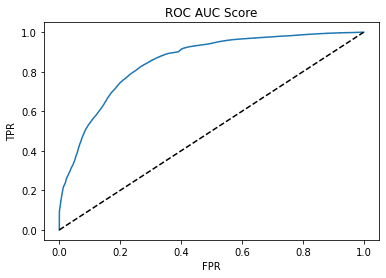

ROC AUC SCORE : 0.8520693692734085


In [ ]:
plot_roc_curve(rf,X[best_features_list],y)

In [ ]:
submit_best_model(rf,best_features_list)
# 0.55

In [ ]:
find_best_threshold(rf,X[best_features_list],y)

        TPR       FPR  Threshold  Difference
0  0.827774  0.269299   0.535997    0.558475
1  0.827746  0.269271   0.536009    0.558475
2  0.827788  0.269327   0.535987    0.558461
3  0.827774  0.269327   0.535990    0.558446
4  0.827746  0.269299   0.536004    0.558446



Best Threshold where MAX(TPR - FPR ) is higher : 0.5359966674747249



Classification Report for best Threshold :

              precision    recall  f1-score   support

           0       0.81      0.73      0.77     70988
           1       0.75      0.83      0.79     70988

    accuracy                           0.78    141976
   macro avg       0.78      0.78      0.78    141976
weighted avg       0.78      0.78      0.78    141976



In [ ]:
submit_best_threshold_features_model(rf,0.5399,best_features_list)
# 0.5595056712

In [62]:
update_scorecard('RFE-Random Forest',0.772,0.85,0.79,0.5595056712)

### Model 7 - Bagging(RandomForest) and Boosting(Adaboost,Gradient Boosting and XGBoost)

In [ ]:
# Lets try with Bagging and Boosting Alogorithmns

In [ ]:
adb = AdaBoostClassifier(learning_rate= 0.15, n_estimators= 350,random_state=10)

adb.fit(X[best_features_list],y)

AdaBoostClassifier(learning_rate=0.15, n_estimators=350, random_state=10)

In [ ]:
print_metrics(adb,X[best_features_list],y)

Accuracy score : 0.8069673747675663


Classification Report : 

               precision    recall  f1-score   support

           0       0.84      0.76      0.80     70988
           1       0.78      0.86      0.82     70988

    accuracy                           0.81    141976
   macro avg       0.81      0.81      0.81    141976
weighted avg       0.81      0.81      0.81    141976



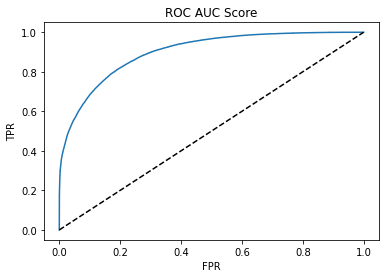

ROC AUC SCORE : 0.8995093158787772


In [ ]:
plot_roc_curve(adb,X[best_features_list],y)

In [ ]:
submit_best_model(adb,best_features_list)
#0.51

In [ ]:
find_best_threshold(adb,X[best_features_list],y)

        TPR       FPR  Threshold  Difference
0  0.812222  0.191497   0.501135    0.620725
1  0.812165  0.191455   0.501136    0.620711
2  0.812137  0.191427   0.501136    0.620711
3  0.812180  0.191483   0.501135    0.620696
4  0.812081  0.191384   0.501138    0.620696



Best Threshold where MAX(TPR - FPR ) is higher : 0.5011351159205554



Classification Report for best Threshold :

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     70988
           1       0.81      0.81      0.81     70988

    accuracy                           0.81    141976
   macro avg       0.81      0.81      0.81    141976
weighted avg       0.81      0.81      0.81    141976



In [ ]:
# Here best threshold is 0.5...Default is also 0.50..so will not be much differnce

In [63]:
update_scorecard('RFE-AdaBoost',0.80,0.89,0.81,0.51)

In [ ]:
gb = GradientBoostingClassifier()

# Fitting the X_train and y_train
gb.fit(X[best_features_list],y)

GradientBoostingClassifier()

In [ ]:
print_metrics(gb,X[best_features_list],y)

Accuracy score : 0.8491928213219135


Classification Report : 

               precision    recall  f1-score   support

           0       0.86      0.84      0.85     70988
           1       0.84      0.86      0.85     70988

    accuracy                           0.85    141976
   macro avg       0.85      0.85      0.85    141976
weighted avg       0.85      0.85      0.85    141976



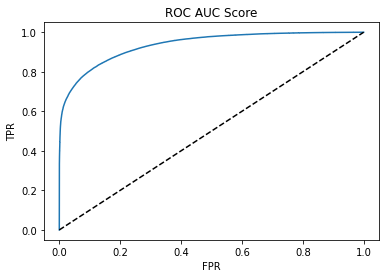

ROC AUC SCORE : 0.9359419391566521


In [ ]:
plot_roc_curve(gb,X[best_features_list],y)

In [ ]:
submit_best_model(gb,best_features_list)
#0.38

In [ ]:
find_best_threshold(gb,X[best_features_list],y)

        TPR       FPR  Threshold  Difference
0  0.819519  0.113540   0.564227    0.705978
1  0.819688  0.113723   0.563949    0.705964
2  0.819674  0.113709   0.563959    0.705964
3  0.819631  0.113681   0.564024    0.705950
4  0.819533  0.113583   0.564187    0.705950



Best Threshold where MAX(TPR - FPR ) is higher : 0.5642271486968371



Classification Report for best Threshold :

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     70988
           1       0.88      0.82      0.85     70988

    accuracy                           0.85    141976
   macro avg       0.85      0.85      0.85    141976
weighted avg       0.85      0.85      0.85    141976



In [ ]:
submit_best_threshold_features_model(gb,0.56422,best_features_list)
# 0.5215878735

In [64]:
update_scorecard('RFE-GradientBoost',0.84,0.93,0.85,0.5215878735)

In [ ]:
# Xtreme Gradient Boosting

In [ ]:
# Taking the best features in a list
best = ['Asst_Reg','Yearly Income','Unpaid 2 years','Debt to Income','Lend Amount','Deprecatory Records','Interest Charged','Usage Rate','Inquiries','Present Balance','Gross Collection','Account Open',
 'Total Unpaid CL','Unpaid Amount','Due Fee','GGGrade_II','GGGrade_III','GGGrade_IV','GGGrade_V','GGGrade_VI','GGGrade_VII','Experience_2yrs','Experience_3yrs','Experience_4yrs','Experience_6yrs','Experience_7yrs','Experience_8yrs',
 'Experience_9yrs','Experience_<1yr','Experience_>10yrs','Validation_Source Verified','Home Status_OTHER','Duration_5 years','Reason_credit  card','Reason_debt  consolidation','Reason_home  improvement','Reason_house',
 'Reason_renewable  energy','Reason_small  business','Claim Type_Joint Account']

In [ ]:
# Since XGBoost do not access feature name containing > , we need to rename the feature names
best_features_list[best_features_list.index('Experience_<1yr')]='Experience_1yr_lesser'
best_features_list[best_features_list.index('Experience_>10yrs')] ='Experience_10yrs_greater'

X= X.rename(columns ={'Experience_<1yr':'Experience_1yr_lesser','Experience_>10yrs':'Experience_10yrs_greater'})

X_test_scaled= X_test_scaled.rename(columns ={'Experience_<1yr':'Experience_1yr_lesser','Experience_>10yrs':'Experience_10yrs_greater'})

In [ ]:
xg = XGBClassifier()
xg.fit(X[best_features_list],y)

XGBClassifier()

In [ ]:
print_metrics(xg,X[best_features_list],y)

Accuracy score : 0.8473474390037753


Classification Report : 

               precision    recall  f1-score   support

           0       0.86      0.83      0.84     70988
           1       0.83      0.87      0.85     70988

    accuracy                           0.85    141976
   macro avg       0.85      0.85      0.85    141976
weighted avg       0.85      0.85      0.85    141976



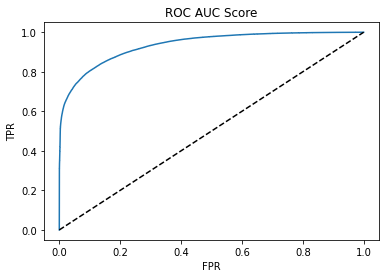

ROC AUC SCORE : 0.9353400898282274


In [ ]:
plot_roc_curve(xg,X[best_features_list],y)

In [ ]:
submit_best_model(xg,best_features_list)
#0.41

In [ ]:
find_best_threshold(xg,X[best_features_list],y)

        TPR       FPR  Threshold  Difference
0  0.806221  0.101947   0.583095    0.704274
1  0.806460  0.102186   0.582886    0.704274
2  0.806474  0.102214   0.582872    0.704260
3  0.806263  0.102017   0.583060    0.704246
4  0.806460  0.102214   0.582877    0.704246



Best Threshold where MAX(TPR - FPR ) is higher : 0.5830948



Classification Report for best Threshold :

              precision    recall  f1-score   support

           0       0.82      0.90      0.86     70988
           1       0.89      0.81      0.85     70988

    accuracy                           0.85    141976
   macro avg       0.86      0.85      0.85    141976
weighted avg       0.86      0.85      0.85    141976



In [ ]:
submit_best_threshold_features_model(xg,0.5830,best_features_list)
# 0.5115859938

In [65]:
update_scorecard('RFE-Xtreme Gradient Boosting',0.84,0.93,0.85,0.5115859938)

### Model 8 - Stacking Classifier

In [ ]:
# Stacking Classifier

In [ ]:
stack = StackingClassifier([('DT',DecisionTreeClassifier(max_depth=3)),('RF',RandomForestClassifier(max_depth=3))],final_estimator=AdaBoostClassifier())

stack.fit(X[best_features_list],y)

StackingClassifier(estimators=[('DT', DecisionTreeClassifier(max_depth=3)),
                               ('RF', RandomForestClassifier(max_depth=3))],
                   final_estimator=AdaBoostClassifier())

In [ ]:
print_metrics(stack,X[best_features_list],y)

Accuracy score : 0.7826956668732744


Classification Report : 

               precision    recall  f1-score   support

           0       0.81      0.74      0.77     70988
           1       0.76      0.83      0.79     70988

    accuracy                           0.78    141976
   macro avg       0.79      0.78      0.78    141976
weighted avg       0.79      0.78      0.78    141976



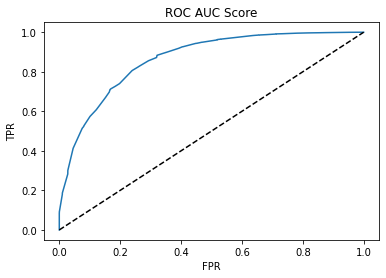

ROC AUC SCORE : 0.8646484489084633


In [ ]:
plot_roc_curve(stack,X[best_features_list],y)

In [ ]:
submit_best_model(stack,best_features_list)
#0.5510481677

In [ ]:
find_best_threshold(stack,X[best_features_list],y)

        TPR       FPR  Threshold  Difference
0  0.806404  0.239435   0.500934    0.566969
1  0.806418  0.239548   0.500435    0.566870
2  0.823407  0.257973   0.500401    0.565434
3  0.829971  0.264580   0.500084    0.565391
4  0.830056  0.264763   0.499997    0.565293



Best Threshold where MAX(TPR - FPR ) is higher : 0.5009340866202752



Classification Report for best Threshold :

              precision    recall  f1-score   support

           0       0.80      0.76      0.78     70988
           1       0.77      0.81      0.79     70988

    accuracy                           0.78    141976
   macro avg       0.78      0.78      0.78    141976
weighted avg       0.78      0.78      0.78    141976



In [ ]:
submit_best_threshold_features_model(xg,0.5009,best_features_list)
# 0.5531004227

In [66]:
update_scorecard('Stacking Classifier',0.78,0.86,0.79,0.5531004227)

### Model 9 - Naive Bayes

In [ ]:
# Naive Bayes

classifier = GaussianNB()  
classifier.fit(X[best_features_list], y)

GaussianNB()

In [ ]:
print_metrics(classifier,X[best_features_list], y)

Accuracy score : 0.5150800135234124


Classification Report : 

               precision    recall  f1-score   support

           0       0.85      0.04      0.07     70988
           1       0.51      0.99      0.67     70988

    accuracy                           0.52    141976
   macro avg       0.68      0.52      0.37    141976
weighted avg       0.68      0.52      0.37    141976



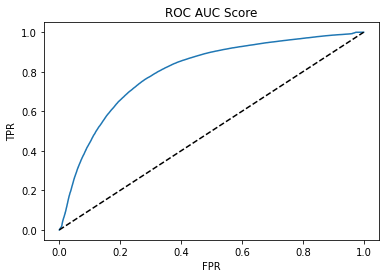

ROC AUC SCORE : 0.8008016219298424


In [ ]:
plot_roc_curve(classifier,X[best_features_list], y)

In [ ]:
find_best_threshold(classifier,X[best_features_list], y)

        TPR       FPR  Threshold  Difference
0  0.761932  0.282090        1.0    0.479842
1  0.761903  0.282076        1.0    0.479828
2  0.762030  0.282203        1.0    0.479828
3  0.762002  0.282189        1.0    0.479813
4  0.761988  0.282174        1.0    0.479813



Best Threshold where MAX(TPR - FPR ) is higher : 0.9999999831045906



Classification Report for best Threshold :

              precision    recall  f1-score   support

           0       0.75      0.72      0.73     70988
           1       0.73      0.76      0.75     70988

    accuracy                           0.74    141976
   macro avg       0.74      0.74      0.74    141976
weighted avg       0.74      0.74      0.74    141976



In [ ]:
submit_best_model(classifier,best_features_list)
# Not contributing Much

In [67]:
update_scorecard('Naive Bayes',0.51,0.80,0.75,'-')

### Model 10 - Stochastic Gradient Descent

In [140]:
gd = SGDClassifier(random_state=110,class_weight='balanced',penalty='l2')

gd.fit(X[best_features_list],y)

SGDClassifier(class_weight='balanced', random_state=110)

In [141]:
print_metrics(gd,X[best_features_list],y)

Accuracy score : 0.7651645348509607


Classification Report : 

               precision    recall  f1-score   support

           0       0.78      0.74      0.76     70988
           1       0.75      0.79      0.77     70988

    accuracy                           0.77    141976
   macro avg       0.77      0.77      0.77    141976
weighted avg       0.77      0.77      0.77    141976



In [142]:
gd_train_pred = gd.predict(X[best_features_list])

In [143]:
submit_best_model(gd,best_features_list)
# F1 score - 0.5712

In [68]:
update_scorecard('Stochastic Gradient Descent',0.76,'-',0.77,0.5712)

# 5.HyperParameter Tuning

### Decision Tree

In [ ]:
# Decision Tree

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Decision Tree Hyper Parameter Tuning

dt_tuned_params = {'criterion' : ['entropy', 'gini'],'max_depth' : range(2, 10),'min_samples_split' :range(2,10)}

# Grid Search CV
dt_best_grid = GridSearchCV(estimator = DecisionTreeClassifier(),param_grid=dt_tuned_params,cv=5)

dt_best_grid.fit(X[best_features_list],y)
dt_best_grid.best_params_

{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 8}

In [69]:
# Fitting the best params
dt_best = DecisionTreeClassifier(criterion= 'gini', max_depth= 9, min_samples_split= 8,random_state=10)

dt_best.fit(X[best_features_list],y)


DecisionTreeClassifier(max_depth=9, min_samples_split=8, random_state=10)

In [70]:
print_metrics(dt_best,X[best_features_list],y)

Accuracy score : 0.8118203076576322


Classification Report : 

               precision    recall  f1-score   support

           0       0.84      0.78      0.80     70988
           1       0.79      0.85      0.82     70988

    accuracy                           0.81    141976
   macro avg       0.81      0.81      0.81    141976
weighted avg       0.81      0.81      0.81    141976



In [71]:
# Finding the Best Features
dt_best_features = pd.DataFrame()
dt_best_features['Features'] = X[best_features_list].columns
dt_best_features['scores'] = dt_best.feature_importances_
dt_best_features = dt_best_features.sort_values(by='scores',ascending=False)

dt_best_features

,Features,scores
0,Asst_Reg,0.664491
8,Inquiries,0.150319
31,Duration_5 years,0.050262
10,Gross Collection,0.046599
2,Unpaid 2 years,0.034707
15,Number of dependents,0.022093
3,Debt to Income,0.005262
7,Usage Rate,0.004606
11,Account Open,0.003262
1,Yearly Income,0.002742


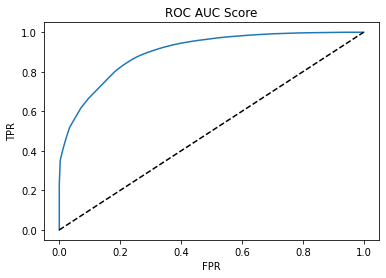

ROC AUC SCORE : 0.899936183230592


In [72]:
plot_roc_curve(dt_best,X[best_features_list],y)

In [203]:
submit_best_model(dt_best,best_features_list)
# 0.5446466963- F1 score

In [204]:
find_best_threshold(dt_best,X[best_features_list],y)

        TPR       FPR  Threshold  Difference
0  0.829999  0.231180   0.509950    0.598820
1  0.830338  0.231518   0.500000    0.598820
2  0.824224  0.225630   0.528777    0.598594
3  0.834916  0.236336   0.487256    0.598580
4  0.822153  0.223784   0.536585    0.598369



Best Threshold where MAX(TPR - FPR ) is higher : 0.5099502487562189



Classification Report for best Threshold :

              precision    recall  f1-score   support

           0       0.82      0.77      0.79     70988
           1       0.78      0.83      0.81     70988

    accuracy                           0.80    141976
   macro avg       0.80      0.80      0.80    141976
weighted avg       0.80      0.80      0.80    141976



In [205]:
submit_best_threshold_features_model(dt_best,0.50995,best_features_list)
# 0.5473005486

In [73]:
update_scorecard('Tuned Decision Tree',0.81,0.89,0.81,0.5473005486)

### Ridge Classifier

In [ ]:
r_params = [{'alpha':[1e-15,1e-10,1e-8,1e-5,1e-6,1e-4,0.0001,0.001,0.05,0.01,0.1,1,2,4,5,10,15,20,30,50,80,100]}]
r_grid = GridSearchCV(estimator=RidgeClassifier(),param_grid=r_params,cv=5).fit(X[best_features_list],y)
r_grid.best_params_

{'alpha': 100}

In [ ]:
# Initializing the Ridge Regression
reg_best = RidgeClassifier(alpha=100)

# Fitting the training set
reg_best.fit(X[best_features_list],y)


RidgeClassifier(alpha=100)

In [ ]:
print_metrics(reg_best,X[best_features_list],y)

Accuracy score : 0.7625514171409252


Classification Report : 

               precision    recall  f1-score   support

           0       0.77      0.75      0.76     70988
           1       0.75      0.78      0.77     70988

    accuracy                           0.76    141976
   macro avg       0.76      0.76      0.76    141976
weighted avg       0.76      0.76      0.76    141976



In [ ]:
submit_best_model(reg_best,best_features_list)
#0.55

In [74]:
update_scorecard('Tuned Ridge Classifier',0.76,'-',0.77,0.55)

In [ ]:
# Random Forest Hyper Parameter Tuning 

#rf_tuned_params = {'criterion' : ['entropy', 'gini'],'n_estimators' : [90, 100, 150, 200],
 #               'max_depth':range(1,20),'min_samples_split':range(1,10)}


#rf_best_grid = GridSearchCV(estimator = RandomForestClassifier(),param_grid=rf_tuned_params,cv=5)

#rf_best_grid.fit(X[best_features_list],y)
#rf_best_grid.best_params_

# Not Ran(TimeOut)

In [ ]:
logreg_tuned_params = {'solver' : ['newton-cg', 'lbfgs', 'liblinear','saga','sag'],'max_iter' : range(100,400),
                'class_weight':['balanced','imbalanced'],'C':[100, 10, 1.0, 0.1, 0.01]}


logreg_best_grid = GridSearchCV(estimator = LogisticRegression(),param_grid=logreg_tuned_params,cv=5,scoring='f1')

logreg_best_grid.fit(X[best_features_list],y)
logreg_best_grid.best_params_

# Best Params are class_weight='balanced',random_state=110,solver='saga',max_iter=400,penalty='l1'

In [75]:
# Lets Try with Random Sampling Technique and build the Logistic Regression With Best Params

### Random Sampling Technique

In [ ]:
X_train_scaled= X_train_scaled.rename(columns ={'Experience_<1yr':'Experience_1yr_lesser','Experience_>10yrs':'Experience_10yrs_greater'})

In [83]:
ros = RandomOverSampler(random_state=100)
X_res,y_res = ros.fit_resample(X_train_scaled,y_train)

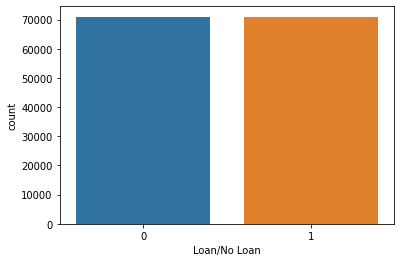

In [84]:
sns.countplot(y)
plt.show()

### (Best Model)ROSE - Logistic Regression

In [342]:
# Logistic Regression With Full Features with Best Params
log = LogisticRegression(class_weight='balanced',random_state=200,solver='saga',max_iter=400,penalty='l1')

log.fit(X_res,y_res)
print_metrics(log,X_res,y_res)
submit_base_model(log)
# 0.5782611

Accuracy score : 0.7512678199132248


Classification Report : 

               precision    recall  f1-score   support

           0       0.75      0.75      0.75     70988
           1       0.75      0.76      0.75     70988

    accuracy                           0.75    141976
   macro avg       0.75      0.75      0.75    141976
weighted avg       0.75      0.75      0.75    141976



In [77]:
update_scorecard('ROSE-Tuned LR with Full Features',0.76,0.84,0.75,0.5750286369)

In [220]:
# Logistic Regression With Best features with Best Params
logreg_best = LogisticRegression(class_weight='balanced',random_state=110,solver='saga',max_iter=400,penalty='l1')

logreg_best.fit(X_res[best_features_list],y_res)

LogisticRegression(class_weight='balanced', max_iter=400, penalty='l1',
                   random_state=110, solver='saga')

In [221]:
print_metrics(logreg_best,X_res[best_features_list],y_res)

Accuracy score : 0.7509015608271821


Classification Report : 

               precision    recall  f1-score   support

           0       0.75      0.75      0.75     70988
           1       0.75      0.76      0.75     70988

    accuracy                           0.75    141976
   macro avg       0.75      0.75      0.75    141976
weighted avg       0.75      0.75      0.75    141976



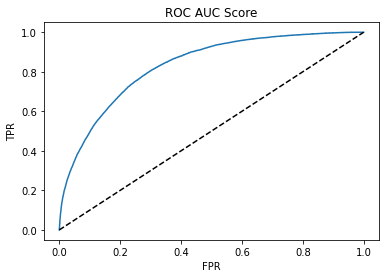

ROC AUC SCORE : 0.8312189522712043


In [222]:
plot_roc_curve(logreg_best,X_res[best_features_list],y_res)

In [223]:
submit_best_model(logreg_best,best_features_list)
# 0.5751868

In [138]:
find_best_threshold(logreg_best,X_res[best_features_list],y_res)

        TPR       FPR  Threshold  Difference
0  0.790711  0.283837   0.448237    0.506874
1  0.794486  0.287612   0.442196    0.506874
2  0.794303  0.287429   0.442484    0.506874
3  0.793416  0.286555   0.443779    0.506860
4  0.793374  0.286527   0.443871    0.506846



Best Threshold where MAX(TPR - FPR ) is higher : 0.4482370857193752



Classification Report for best Threshold :

              precision    recall  f1-score   support

           0       0.77      0.72      0.74     70988
           1       0.74      0.79      0.76     70988

    accuracy                           0.75    141976
   macro avg       0.75      0.75      0.75    141976
weighted avg       0.75      0.75      0.75    141976



In [134]:
submit_best_threshold_features_model(logreg_best,0.44823,best_features_list)
# 0.5741561

In [78]:
update_scorecard('ROSE-Tuned LR with Best Features',0.75,0.8312,0.76,0.5751868)

### ROSE - Ridge Classifier

In [ ]:
reg = RidgeClassifier()

reg.fit(X_res[best_features_list],y_res)

reg.score(X_res[best_features_list],y_res)

0.7483940947765819

In [ ]:
ridge_train_pred = reg.predict(X_res[best_features_list])

print(metrics.classification_report(y_res,ridge_train_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75     70988
           1       0.75      0.75      0.75     70988

    accuracy                           0.75    141976
   macro avg       0.75      0.75      0.75    141976
weighted avg       0.75      0.75      0.75    141976



In [ ]:
submit_best_model(reg,best_features_list)
#0.5704

In [79]:
update_scorecard('ROSE-Ridge Classifier',0.74,'-',0.75,0.5704)

# Best Model

In [80]:
# Prinitng the Final Score
score_card

,Model Name,Accuracy,ROC_AUC_SCORE,Train_f1,Test_f1
0,Base Logistic Regression,0.74000,0.83,0.52,0.5716
1,Base Ridge Classifier,0.83813,-,0.35,0.31
2,SMOTE - Logistic Regression,0.76570,0.84,0.79,0.57344
3,RFE-Logistic Regression,0.76000,0.84,0.78,0.573682
4,RFE-Decision Tree,0.76000,0.82,0.78,0.558466
5,RFE-Random Forest,0.77200,0.85,0.79,0.559506
6,RFE-AdaBoost,0.80000,0.89,0.81,0.51
7,RFE-GradientBoost,0.84000,0.93,0.85,0.521588
8,RFE-Xtreme Gradient Boosting,0.84000,0.93,0.85,0.511586
9,Stacking Classifier,0.78000,0.86,0.79,0.5531


In [82]:
# Among all the models built ,ROSE-Tuned LR with Best Features performs better with Test F1 score 0.5782611

In [81]:
# The Most Important Features that are contributing to the Models acording to Decision Tree

dt_best_features

,Features,scores
0,Asst_Reg,0.664491
8,Inquiries,0.150319
31,Duration_5 years,0.050262
10,Gross Collection,0.046599
2,Unpaid 2 years,0.034707
15,Number of dependents,0.022093
3,Debt to Income,0.005262
7,Usage Rate,0.004606
11,Account Open,0.003262
1,Yearly Income,0.002742
